In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_cleansing import Wrangling_data
from custom_transformer import Streak_score_wavg, GD_weight_avg, Merge_rank_league_perform
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np


# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config
# listing model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from supreme_cross_validation import HyperclassifierSearch

# pipline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Normalize data 
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# imbalance data
from imblearn.over_sampling import  SMOTE, RandomOverSampler
from sklearn.model_selection import RepeatedStratifiedKFold

# Save model
import pickle
import joblib
import os
import time
from datetime import datetime

# Visual the confusion matrix
import matplotlib.pyplot as plt

In [3]:
import warnings

# Filter or ignore specific warning category
warnings.filterwarnings("ignore")

# Train Data

## Export file

In [4]:
path = 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data'
path

'C:/Users/user2/PycharmProjects/selenium_scraping_match/data'

In [5]:
pwd

'C:\\Users\\user2\\PycharmProjects\\customTransformer'

In [6]:
data_list = [os.path.join(path,file) for file in os.listdir(path) if os.path.splitext(file)[-1] == '.csv']
data_list

["C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\2019 FIFA Women's World Cup_detail_match.csv",
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\2021 Friendlies (W)_detail_match.csv',
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\2022 Friendlies (W)_detail_match.csv',
 "C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\AFC Women's Asian Cup qualification_detail_match.csv",
 "C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\AFC Women's Asian Cup_detail_match.csv",
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\Africa Women Cup of Nations_detail_match.csv',
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\Algarve Cup_detail_match.csv',
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\CONCACAF W Championship_detail_match.csv',
 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data\\Copa América Femenina_detail_match.csv',
 "C:/Users/user2/PycharmProjects/selenium_scraping

## Combine data frame

In [7]:
dfs = [pd.read_csv(filepath_or_buffer=f,parse_dates=['Date']) for f in data_list]

In [8]:
full_df = pd.concat(dfs,ignore_index=True).sort_values(by='Date').reset_index(drop=True)
full_df

,Tournament,Round,Day,Date,Time,Home,Away,score_home,score_away,pen_home,pen_away,result,pen_result,Venue
0,2019 FIFA Women's World Cup,Group stage,Fri,2019-06-07 21:00:00,21:00,France,Korea Rep,4,0,0,0,H,0,Parc des Princes
1,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 15:00:00,15:00,Germany,China PR,1,0,0,0,H,0,Roazhon Park
2,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 18:00:00,18:00,Spain,South Africa,3,1,0,0,H,0,Stade Océane
3,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 21:00:00,21:00,Norway,Nigeria,3,0,0,0,H,0,Stade Auguste-Delaune II
4,2019 FIFA Women's World Cup,Group stage,Sun,2019-06-09 13:00:00,13:00,Australia,Italy,1,2,0,0,A,0,Stade du Hainaut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,FIFA Women's World Cup,Quarter-finals,Fri,2023-08-11 19:30:00,19:30,Japan,Sweden,1,2,0,0,A,0,Eden Park (Neutral Site)
1452,FIFA Women's World Cup,Quarter-finals,Sat,2023-08-12 17:00:00,17:00,Australia,France,0,0,7,6,D,H,Suncorp Stadium (Neutral Site)
1453,FIFA Women's World Cup,Quarter-finals,Sat,2023-08-12 20:30:00,20:30,England,Colombia,2,1,0,0,H,0,Accor Stadium (Neutral Site)
1454,FIFA Women's World Cup,Semi-finals,Tue,2023-08-15 20:00:00,20:00,Spain,Sweden,2,1,0,0,H,0,Eden Park (Neutral Site)


# Create clean data for features engineering purpose

In [9]:
path = 'C:/Users/user2/PycharmProjects/selenium_scraping_match/data'
raw_df = Wrangling_data(data_path=path)
clean_df = raw_df.df_wrangling(update_league_tb=False, update_team_perf=False)

Connect database ./database/soccer_database.db successfully
 Table 'league_tb' is exported to Dataframe successfully.
An exception of type KeyError occurred. Arguments:
('Tournament',)


In [10]:
clean_df['Tournament_id'].value_counts(sort=False)

Tournament_id
5      52
6     204
7     206
13    118
9     242
2      26
3      25
8     232
1       6
11     28
14     16
15     31
12     25
10    177
4       6
16     62
Name: count, dtype: int64

In [18]:
full_df[full_df['Tournament']=="2019 FIFA Women's World Cup"]

,Tournament,Round,Day,Date,Time,Home,Away,score_home,score_away,pen_home,pen_away,result,pen_result,Venue
0,2019 FIFA Women's World Cup,Group stage,Fri,2019-06-07 21:00:00,21:00,France,Korea Rep,4,0,0,0,H,0,Parc des Princes
1,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 15:00:00,15:00,Germany,China PR,1,0,0,0,H,0,Roazhon Park
2,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 18:00:00,18:00,Spain,South Africa,3,1,0,0,H,0,Stade Océane
3,2019 FIFA Women's World Cup,Group stage,Sat,2019-06-08 21:00:00,21:00,Norway,Nigeria,3,0,0,0,H,0,Stade Auguste-Delaune II
4,2019 FIFA Women's World Cup,Group stage,Sun,2019-06-09 13:00:00,13:00,Australia,Italy,1,2,0,0,A,0,Stade du Hainaut
5,2019 FIFA Women's World Cup,Group stage,Sun,2019-06-09 15:30:00,15:30,Brazil,Jamaica,3,0,0,0,H,0,Stade des Alpes
6,2019 FIFA Women's World Cup,Group stage,Sun,2019-06-09 18:00:00,18:00,England,Scotland,2,1,0,0,H,0,Stade de Nice
7,2019 FIFA Women's World Cup,Group stage,Mon,2019-06-10 18:00:00,18:00,Argentina,Japan,0,0,0,0,D,0,Parc des Princes
8,2019 FIFA Women's World Cup,Group stage,Mon,2019-06-10 21:00:00,21:00,Canada,Cameroon,1,0,0,0,H,0,Stade de la Mosson
9,2019 FIFA Women's World Cup,Group stage,Tue,2019-06-11 15:00:00,15:00,New Zealand,Netherlands,0,1,0,0,A,0,Stade Océane


In [20]:
clean_df[clean_df['Tournament_id']==5]

,tour_start,Tournament_id,round_id,Date,Home,Away,score_home,score_away,result,pen_result,home_point,away_point,home_win,away_win,home_perf_wm,away_perf_wm,rank_diff
0,2019,5,1,2019-06-07 21:00:00,France,Korea Rep,4,0,H,0,2026.65,1840.27,1,0,0.864925,0.229503,186.38
1,2019,5,1,2019-06-08 15:00:00,Germany,China PR,1,0,H,0,2061.56,1854.49,1,0,0.800373,0.155556,207.07
2,2019,5,1,2019-06-08 18:00:00,Spain,South Africa,3,1,H,0,2002.28,1471.52,1,0,0.923079,0.407767,530.76
3,2019,5,1,2019-06-08 21:00:00,Norway,Nigeria,3,0,H,0,1908.25,1554.94,1,0,0.737805,0.404348,353.31
4,2019,5,1,2019-06-09 13:00:00,Australia,Italy,1,2,A,0,1919.69,1846.50,0,1,0.401938,0.473333,73.19
5,2019,5,1,2019-06-09 15:30:00,Brazil,Jamaica,3,0,H,0,1995.30,1536.81,1,0,0.880956,0.372564,458.49
6,2019,5,1,2019-06-09 18:00:00,England,Scotland,2,1,H,0,2040.76,1735.87,1,0,0.716496,0.588235,304.89
7,2019,5,1,2019-06-10 18:00:00,Argentina,Japan,0,0,D,0,1682.45,1916.68,0,0,0.559024,0.452703,-234.23
8,2019,5,1,2019-06-10 21:00:00,Canada,Cameroon,1,0,H,0,1996.34,1445.75,1,0,0.817745,0.333333,550.59
9,2019,5,1,2019-06-11 15:00:00,New Zealand,Netherlands,0,1,A,0,1699.70,1980.47,0,1,0.278421,0.479614,-280.77


In [19]:
clean_df

,tour_start,Tournament_id,round_id,Date,Home,Away,score_home,score_away,result,pen_result,home_point,away_point,home_win,away_win,home_perf_wm,away_perf_wm,rank_diff
0,2019,5,1,2019-06-07 21:00:00,France,Korea Rep,4,0,H,0,2026.65,1840.27,1,0,0.864925,0.229503,186.38
1,2019,5,1,2019-06-08 15:00:00,Germany,China PR,1,0,H,0,2061.56,1854.49,1,0,0.800373,0.155556,207.07
2,2019,5,1,2019-06-08 18:00:00,Spain,South Africa,3,1,H,0,2002.28,1471.52,1,0,0.923079,0.407767,530.76
3,2019,5,1,2019-06-08 21:00:00,Norway,Nigeria,3,0,H,0,1908.25,1554.94,1,0,0.737805,0.404348,353.31
4,2019,5,1,2019-06-09 13:00:00,Australia,Italy,1,2,A,0,1919.69,1846.50,0,1,0.401938,0.473333,73.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2023,16,3,2023-08-11 19:30:00,Japan,Sweden,1,2,A,0,1916.68,2049.71,0,1,0.705499,0.501471,-133.03
1452,2023,16,3,2023-08-12 17:00:00,Australia,France,0,0,D,H,1919.69,2026.65,0,0,0.401938,0.387168,-106.96
1453,2023,16,3,2023-08-12 20:30:00,England,Colombia,2,1,H,0,2040.76,1702.64,1,0,0.716496,0.368394,338.12
1454,2023,16,4,2023-08-15 20:00:00,Spain,Sweden,2,1,H,0,2002.28,2049.71,1,0,0.923079,0.501471,-47.43


# Build Feature Engineer Pipeline

## Define

In [11]:
def get_feature(df:pd.DataFrame, is_train:bool=False):
    df['Time'] = df['Date'].dt.time
    df['Date'] = pd.to_datetime(df['Date'].dt.date)
    features_col = ['Date', 'Time', 'Tournament_id', 'round_id', 'Home', 'Away', 'home_perf_wm', 'away_perf_wm',
                        'rank_diff', 'Home_streak_score', 'Away_streak_score', 'Home_streak_length',
                        'Away_streak_length', 'Home_diff_score', 'Away_diff_score']
    if is_train:
        features_col.extend(['result','pen_result'])
        filter_length = (df['Home_streak_length'] >= 5) & (df['Away_streak_length'] >= 5)
        df = df.loc[filter_length, features_col].reset_index(drop=True).drop(columns=['Home_streak_length','Away_streak_length'])
        return df
    else:
        df = df[features_col].drop(columns=['Home_streak_length','Away_streak_length'])
        return df

## feature engineer

In [12]:
streak_feat_list = ['Home_streak_score', 'Away_streak_score', 'Home_streak_length', 'Away_streak_length']
GD_feat_list = ['Home_diff_score', 'Away_diff_score']

In [13]:
feature_engineer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('merger', Merge_rank_league_perform()),
    ('streak_score',Streak_score_wavg(df=clean_df, feat_names=streak_feat_list,n=6)),
    ('goal_diff',GD_weight_avg(df=clean_df, feat_names=GD_feat_list,n=6))
])
feature_engineer.fit(full_df)


>>>>Merge_rank_league_perform.fit() called.


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'league_tb' is exported to Dataframe successfully.
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.fit() called.


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.fit() called.



Pipeline(steps=[('merger', Merge_rank_league_perform()),
                ('streak_score',
                 Streak_score_wavg(df=      tour_start  Tournament_id  round_id                Date       Home  \
0           2019              5         1 2019-06-07 21:00:00     France   
1           2019              5         1 2019-06-08 15:00:00    Germany   
2           2019              5         1 2019-06-08 18:00:00      Spain   
3           2019              5         1 2019-06-08 21:00:00     Norway   
4           2019              5         1 2019-06-09 13:00:00  Australia   
...          ...            ...       ...                 ...        ...   
1451        2023             16         3 2023-08-11 19:30:00      Japan   
1452        2023...
2        1471.52         1         0      0.923079      0.407767     530.76  
3        1554.94         1         0      0.737805      0.404348     353.31  
4        1846.50         0         1      0.401938      0.473333      73.19  
...          ...       ...       ...           ...           ...        ...  
1451     2049.71         0         1      0.705499      0.501471    -133.03  
1452     2026.65         0         0      0.401938      0.387168    -106.96  
1453     1702.64         1         0      0.716496      0.368394     338.12  
1454     2049.71         1         0      0.923079      0.501471     -47.43  
1455     2040.76         0         1      0.401938      0.914894    -121.07  

[1456 rows x 17 columns],
                               feat_names=['Home_diff_score',
                                           'Away_diff_score'],
                               n=6))])

## Fit with train data

In [14]:
full_df_pre = feature_engineer.transform(full_df)


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'league_tb' is exported to Dataframe successfully.
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().



In [15]:
final_df = get_feature(df=full_df_pre, is_train=True)
final_df

,Date,Time,Tournament_id,round_id,Home,Away,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,result,pen_result
0,2019-07-02,21:00:00,5,4,England,USA,0.716496,0.555556,-49.27,1.000000,1.000000,1.990424,3.429089,A,0
1,2019-07-03,21:00:00,5,4,Netherlands,Sweden,0.834743,0.501471,-69.24,1.030842,0.949214,1.362714,0.959822,H,0
2,2019-07-06,17:00:00,5,5,England,Sweden,0.716496,0.501471,-8.95,0.936998,0.719511,1.415979,0.579900,A,0
3,2019-07-07,17:00:00,5,6,USA,Netherlands,0.910757,0.479614,109.56,1.000000,1.154977,2.974879,1.293187,H,0
4,2020-03-05,18:30:00,6,1,Malta,Georgia,0.420000,0.000000,131.97,-0.945487,-1.000000,-3.010254,-5.801186,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2023-08-11,19:30:00,16,3,Japan,Sweden,0.705499,0.501471,-133.03,0.979878,0.395191,2.590036,1.032195,A,0
979,2023-08-12,17:00:00,16,3,Australia,France,0.401938,0.387168,-106.96,0.054874,0.572759,1.436822,1.393902,D,H
980,2023-08-12,20:30:00,16,3,England,Colombia,0.716496,0.368394,338.12,0.307864,0.523335,0.762022,0.778454,H,0
981,2023-08-15,20:00:00,16,4,Spain,Sweden,0.923079,0.501471,-47.43,0.784536,0.875788,1.393845,1.468319,H,0


In [16]:
clean_df.tail(12)

,tour_start,Tournament_id,round_id,Date,Home,Away,score_home,score_away,result,pen_result,home_point,away_point,home_win,away_win,home_perf_wm,away_perf_wm,rank_diff
1444,2023,16,2,2023-08-06 12:00:00,Netherlands,South Africa,2,0,H,0,1980.47,1471.52,1,0,0.834743,0.407767,508.95
1445,2023,16,2,2023-08-06 19:00:00,Sweden,USA,0,0,D,H,2049.71,2090.03,0,0,0.691021,0.555556,-40.32
1446,2023,16,2,2023-08-07 17:30:00,England,Nigeria,0,0,D,H,2040.76,1554.94,0,0,0.716496,0.404348,485.82
1447,2023,16,2,2023-08-07 20:30:00,Australia,Denmark,2,0,H,0,1919.69,1866.25,1,0,0.401938,0.470486,53.44
1448,2023,16,2,2023-08-08 18:00:00,Colombia,Jamaica,1,0,H,0,1702.64,1536.81,1,0,0.707407,0.372564,165.83
1449,2023,16,2,2023-08-08 20:30:00,France,Morocco,4,0,H,0,2026.65,1334.08,1,0,0.864925,0.303333,692.57
1450,2023,16,3,2023-08-11 13:00:00,Spain,Netherlands,2,1,H,0,2002.28,1980.47,1,0,0.923079,0.479614,21.81
1451,2023,16,3,2023-08-11 19:30:00,Japan,Sweden,1,2,A,0,1916.68,2049.71,0,1,0.705499,0.501471,-133.03
1452,2023,16,3,2023-08-12 17:00:00,Australia,France,0,0,D,H,1919.69,2026.65,0,0,0.401938,0.387168,-106.96
1453,2023,16,3,2023-08-12 20:30:00,England,Colombia,2,1,H,0,2040.76,1702.64,1,0,0.716496,0.368394,338.12


In [17]:
fil = (full_df['Tournament'] == "FIFA Women's World Cup")&(full_df['Round'] == "Round of 16")
full_df[fil]

,Tournament,Round,Day,Date,Time,Home,Away,score_home,score_away,pen_home,pen_away,result,pen_result,Venue
1442,FIFA Women's World Cup,Round of 16,Sat,2023-08-05 17:00:00,17:00,Switzerland,Spain,1,5,0,0,A,0,Eden Park (Neutral Site)
1443,FIFA Women's World Cup,Round of 16,Sat,2023-08-05 20:00:00,20:00,Japan,Norway,3,1,0,0,H,0,Sky Stadium (Neutral Site)
1444,FIFA Women's World Cup,Round of 16,Sun,2023-08-06 12:00:00,12:00,Netherlands,South Africa,2,0,0,0,H,0,Allianz Stadium (Neutral Site)
1445,FIFA Women's World Cup,Round of 16,Sun,2023-08-06 19:00:00,19:00,Sweden,USA,0,0,5,4,D,H,AAMI Park (Neutral Site)
1446,FIFA Women's World Cup,Round of 16,Mon,2023-08-07 17:30:00,17:30,England,Nigeria,0,0,4,2,D,H,Suncorp Stadium (Neutral Site)
1447,FIFA Women's World Cup,Round of 16,Mon,2023-08-07 20:30:00,20:30,Australia,Denmark,2,0,0,0,H,0,Accor Stadium (Neutral Site)
1448,FIFA Women's World Cup,Round of 16,Tue,2023-08-08 18:00:00,18:00,Colombia,Jamaica,1,0,0,0,H,0,AAMI Park (Neutral Site)
1449,FIFA Women's World Cup,Round of 16,Tue,2023-08-08 20:30:00,20:30,France,Morocco,4,0,0,0,H,0,Coopers Stadium (Neutral Site)


In [18]:
full_df.sort_values(by='Date').reset_index(drop=True).tail(12)

,Tournament,Round,Day,Date,Time,Home,Away,score_home,score_away,pen_home,pen_away,result,pen_result,Venue
1444,FIFA Women's World Cup,Round of 16,Sun,2023-08-06 12:00:00,12:00,Netherlands,South Africa,2,0,0,0,H,0,Allianz Stadium (Neutral Site)
1445,FIFA Women's World Cup,Round of 16,Sun,2023-08-06 19:00:00,19:00,Sweden,USA,0,0,5,4,D,H,AAMI Park (Neutral Site)
1446,FIFA Women's World Cup,Round of 16,Mon,2023-08-07 17:30:00,17:30,England,Nigeria,0,0,4,2,D,H,Suncorp Stadium (Neutral Site)
1447,FIFA Women's World Cup,Round of 16,Mon,2023-08-07 20:30:00,20:30,Australia,Denmark,2,0,0,0,H,0,Accor Stadium (Neutral Site)
1448,FIFA Women's World Cup,Round of 16,Tue,2023-08-08 18:00:00,18:00,Colombia,Jamaica,1,0,0,0,H,0,AAMI Park (Neutral Site)
1449,FIFA Women's World Cup,Round of 16,Tue,2023-08-08 20:30:00,20:30,France,Morocco,4,0,0,0,H,0,Coopers Stadium (Neutral Site)
1450,FIFA Women's World Cup,Quarter-finals,Fri,2023-08-11 13:00:00,13:00,Spain,Netherlands,2,1,0,0,H,0,Sky Stadium (Neutral Site)
1451,FIFA Women's World Cup,Quarter-finals,Fri,2023-08-11 19:30:00,19:30,Japan,Sweden,1,2,0,0,A,0,Eden Park (Neutral Site)
1452,FIFA Women's World Cup,Quarter-finals,Sat,2023-08-12 17:00:00,17:00,Australia,France,0,0,7,6,D,H,Suncorp Stadium (Neutral Site)
1453,FIFA Women's World Cup,Quarter-finals,Sat,2023-08-12 20:30:00,20:30,England,Colombia,2,1,0,0,H,0,Accor Stadium (Neutral Site)


In [19]:
# team = 'Sweden'
# date = '2023-08-06'
# filter = (final_df['Date'] < date) & ((final_df['Home'] == team)|(final_df['Away'] == team))
# sort_team = final_df[filter].sort_values('Date',ascending=False).head(10)
# sort_team

## Test with New data

In [20]:
data = [[16,2,'8/8/2023','France','England']]
columns = ['Tournament_id','round_id', 'Date', 'Home', 'Away']
new_data = pd.DataFrame(data=data,columns=columns)
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data

,Tournament_id,round_id,Date,Home,Away
0,16,2,2023-08-08,France,England


In [21]:
new_data_pre = feature_engineer.transform(new_data)


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().



In [22]:
new_df = get_feature(df=new_data_pre, is_train=False)
new_df

,Date,Time,Tournament_id,round_id,Home,Away,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score
0,2023-08-08,00:00:00,16,2,France,England,0.864925,0.914894,-14.11,0.382308,0.307864,1.031124,0.762022


# Predict with model

## Split Data

In [23]:
target = 'result'
# 'home_perf_wm','away_perf_wm',
features = ['home_perf_wm', 'away_perf_wm', 'rank_diff','Home_streak_score','Away_streak_score','Home_diff_score','Away_diff_score']
wc_23_filter = final_df['Tournament_id']==16

# Train data
train = final_df[~wc_23_filter].sample(frac=1).reset_index(drop=True)
X_train = train[features]
y_train = train[target]

# Test data
X_test =  final_df[wc_23_filter][features]
y_test = final_df[wc_23_filter][target]

In [24]:
X_train.describe()

,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,0.517354,0.319688,40.727144,0.070152,0.029766,0.229828,0.071797
std,0.234614,0.168190,355.906319,0.733352,0.718471,2.197085,2.164829
min,0.000000,0.000000,-1271.800000,-2.200242,-1.818081,-7.802183,-7.359044
25%,0.358824,0.216667,-140.570000,-0.578536,-0.585946,-0.916382,-1.015197
50%,0.487862,0.307377,52.300000,0.148951,0.053381,0.331335,0.160361
75%,0.707407,0.434933,249.760000,0.757511,0.689550,1.518143,1.395252
max,1.000000,0.914894,1646.340000,1.813813,1.814366,7.450567,7.803522


## Build Pipeline Preprocesser 

In [25]:
rb_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', RobustScaler())
])

mm_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_mm_features', mm_transformer, ['home_perf_wm','away_perf_wm','rank_diff','Home_streak_score', 'Away_streak_score', 'Home_diff_score', 'Away_diff_score'])
    ],
    remainder='drop',
    n_jobs=-1
)
preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_mm_features',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['home_perf_wm', 'away_perf_wm', 'rank_diff',
                                  'Home_streak_score', 'Away_streak_score',
                                  'Home_diff_score', 'Away_diff_score'])])

### Random Forest

In [253]:
clf_rf_model = Pipeline(steps=[
    #('preprocessor', preprocessor),
    ('oversampling', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42,
                                   n_jobs=-1,
                                   class_weight='balanced',
                                   max_depth=5,
                                   n_estimators=150))
])
clf_rf_model.fit(X_train,y_train)

Pipeline(steps=[('oversampling', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=150, n_jobs=-1,
                                        random_state=42))])

#### Evaluate data

Start time: Thu Aug 17 14:12:38 2023
Mean ROC AUC: 0.663
Mean Accuracy score: 0.533
Mean F1 score: 0.456 

              precision    recall  f1-score   support

           A       0.47      0.41      0.44        17
           D       0.25      0.38      0.30        13
           H       0.63      0.53      0.58        32

    accuracy                           0.47        62
   macro avg       0.45      0.44      0.44        62
weighted avg       0.51      0.47      0.48        62

Time in running training model: 0.22 min




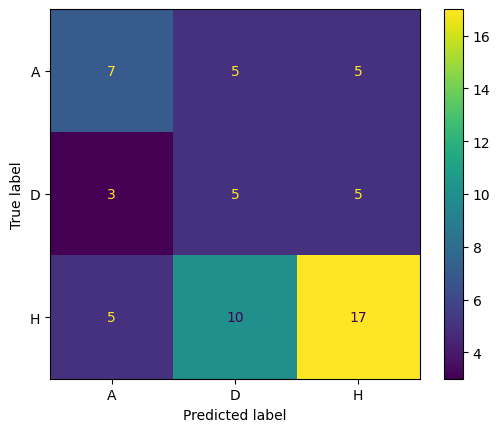

In [254]:
start = time.time()
print("Start time:", time.asctime(time.localtime(start)))

# Cross validation 
cv = 10
# evaluate model
score1 = cross_val_score(clf_rf_model, X_test, y_test, scoring='roc_auc_ovr', cv=cv, n_jobs=-1,error_score='raise')
score2 = cross_val_score(clf_rf_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
score3 = cross_val_score(clf_rf_model, X_test, y_test, scoring='f1_macro', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(score1))
print('Mean Accuracy score: %.3f' % np.mean(score2))
print('Mean F1 score: %.3f \n' % np.mean(score3))
# Classification report 
y_test_prd = clf_rf_model.predict(X_test)
print(classification_report(y_test, y_test_prd))
end = time.time()
print(f'Time in running training model: {round((end-start)/60,2)} min\n\n')

# Visual confusion matrix
class_ =clf_rf_model.steps[-1][1].classes_
cm = confusion_matrix(y_true=y_test,y_pred=y_test_prd)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_).plot()
plt.show()

### Gradient Boosting

In [255]:
clf_gb_model = Pipeline(steps=[
    #('preprocessor', preprocessor),
    ('oversampling', SMOTE(random_state=42)),
    ('clf',GradientBoostingClassifier(random_state=42))
])
clf_gb_model.fit(X_train,y_train)

Pipeline(steps=[('oversampling', SMOTE(random_state=42)),
                ('clf', GradientBoostingClassifier(random_state=42))])

#### Evaluate data

Start time: Thu Aug 17 14:12:55 2023
Mean ROC AUC: 0.676
Mean Accuracy score: 0.519
Mean F1 score: 0.418 

              precision    recall  f1-score   support

           A       0.33      0.35      0.34        17
           D       0.22      0.31      0.26        13
           H       0.65      0.53      0.59        32

    accuracy                           0.44        62
   macro avg       0.40      0.40      0.40        62
weighted avg       0.48      0.44      0.45        62

Time in running training model: 0.06 min




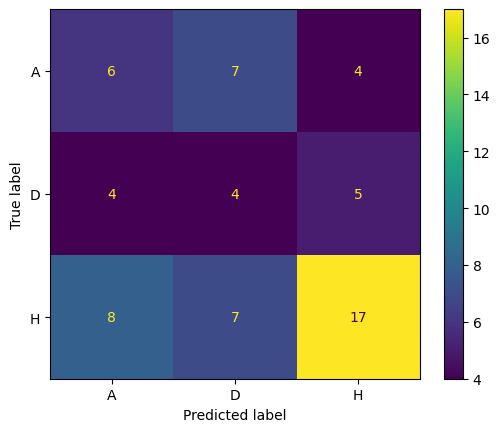

In [256]:
start = time.time()
print("Start time:", time.asctime(time.localtime(start)))
# Cross validation 
cv = 10
# evaluate model
score1 = cross_val_score(clf_gb_model, X_test, y_test, scoring='roc_auc_ovr', cv=cv, n_jobs=-1,error_score='raise')
score2 = cross_val_score(clf_gb_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
score3 = cross_val_score(clf_gb_model, X_test, y_test, scoring='f1_macro', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(score1))
print('Mean Accuracy score: %.3f' % np.mean(score2))
print('Mean F1 score: %.3f \n' % np.mean(score3))
# Classification report 
y_test_prd = clf_gb_model.predict(X_test)
print(classification_report(y_test, y_test_prd))
end = time.time()
print(f'Time in running training model: {round((end-start)/60,2)} min\n\n')

# Visual confusion matrix
cm = confusion_matrix(y_true=y_test,y_pred=y_test_prd)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_).plot()
plt.show()

### Ada Boosting

In [257]:
base_learner = RandomForestClassifier(random_state=42,
                                   n_jobs=-1,
                                   class_weight='balanced',
                                   max_depth=5,
                                   n_estimators=150)

In [258]:
# Build Ada boost model
clf_adb_model = Pipeline(steps=[
    #('preprocessor', preprocessor),
    ('oversampling', SMOTE(random_state=42)),
    ('clf', AdaBoostClassifier(estimator=base_learner,random_state=42,algorithm='SAMME.R'))
])

# Fit model 
clf_adb_model.fit(X_train,y_train)

Pipeline(steps=[('oversampling', SMOTE(random_state=42)),
                ('clf',
                 AdaBoostClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                                     max_depth=5,
                                                                     n_estimators=150,
                                                                     n_jobs=-1,
                                                                     random_state=42),
                                    random_state=42))])

#### Evaluate

Start time: Thu Aug 17 14:13:21 2023
Mean ROC AUC: 0.660
Mean Accuracy score: 0.567
Mean F1 score: 0.497 

              precision    recall  f1-score   support

           A       0.39      0.41      0.40        17
           D       0.12      0.15      0.14        13
           H       0.68      0.59      0.63        32

    accuracy                           0.45        62
   macro avg       0.40      0.39      0.39        62
weighted avg       0.48      0.45      0.47        62

Time in running training model: 0.16 min




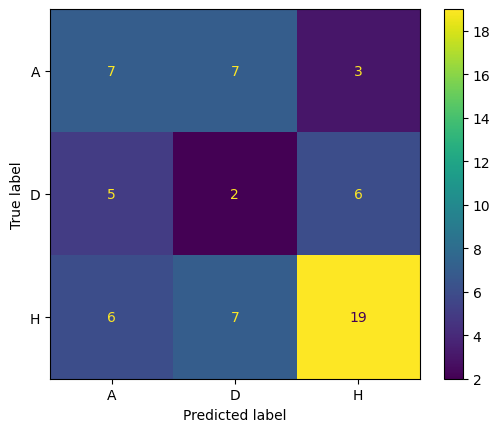

In [259]:
# Set timer
start = time.time()
print("Start time:", time.asctime(time.localtime(start)))
# Cross validation 
cv = 10
# evaluate model
score1 = cross_val_score(clf_adb_model, X_test, y_test, scoring='roc_auc_ovr', cv=cv, n_jobs=-1,error_score='raise')
score2 = cross_val_score(clf_adb_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
score3 = cross_val_score(clf_adb_model, X_test, y_test, scoring='f1_macro', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(score1))
print('Mean Accuracy score: %.3f' % np.mean(score2))
print('Mean F1 score: %.3f \n' % np.mean(score3))
# Classification report 
y_test_prd = clf_adb_model.predict(X_test)
print(classification_report(y_test, y_test_prd))
end = time.time()
print(f'Time in running training model: {round((end-start)/60,2)} min\n\n')

# Visual confusion matrix
cm = confusion_matrix(y_true=y_test,y_pred=y_test_prd)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_).plot()
plt.show()

# Params Tuning

In [265]:
target = 'result'

features = ['home_perf_wm','away_perf_wm','rank_diff','Home_streak_score','Away_streak_score','Home_diff_score','Away_diff_score']
wc_23_filter = final_df['Tournament_id']==16

# Train data
train = final_df[~wc_23_filter].sample(frac=1).reset_index(drop=True)
X_train = train[features]
y_train = train[target]

# Test data
X_test =  final_df[wc_23_filter][features]
y_test = final_df[wc_23_filter][target]

## Preprocessor

In [260]:
rb_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', RobustScaler())
])

mm_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_mm_features', mm_transformer, ['home_perf_wm','away_perf_wm','rank_diff','Home_streak_score', 'Away_streak_score', 'Home_diff_score', 'Away_diff_score'])
    ],
    remainder='drop',
    n_jobs=-1
)
preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_mm_features',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['home_perf_wm', 'away_perf_wm', 'rank_diff',
                                  'Home_streak_score', 'Away_streak_score',
                                  'Home_diff_score', 'Away_diff_score'])])

## Random Forest

In [261]:
train.describe()

,Date,Tournament_id,round_id,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score
count,921,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,2022-04-05 04:15:01.889250560,8.965255,1.220413,0.518118,0.321351,40.727144,0.070152,0.029766,0.229828,0.071797
min,2019-07-02 21:00:00,1.000000,1.000000,0.000000,0.000000,-1271.800000,-2.200242,-1.818081,-7.802183,-7.359044
25%,2021-10-21 00:00:00,8.000000,1.000000,0.359644,0.221519,-140.570000,-0.578536,-0.585946,-0.916382,-1.015197
50%,2022-04-12 00:00:00,9.000000,1.000000,0.492180,0.311269,52.300000,0.148951,0.053381,0.331335,0.160361
75%,2022-10-09 18:30:00,10.000000,1.000000,0.707407,0.445466,249.760000,0.757511,0.689550,1.518143,1.395252
max,2023-07-18 20:15:00,15.000000,6.000000,1.000000,0.913978,1646.340000,1.813813,1.814366,7.450567,7.803522
std,NaN,2.490610,0.688616,0.233976,0.168364,355.906319,0.733352,0.718471,2.197085,2.164829


In [262]:
choose_features = ColumnTransformer(
    transformers=[
        ('rb_scaler',rb_transformer,['rank_diff']),
        ('other_features', 'passthrough', ['home_perf_wm','away_perf_wm','Home_streak_score', 'Away_streak_score', 'Home_diff_score', 'Away_diff_score'])
    ],
    remainder='drop',
    n_jobs=-1
)

In [266]:
set_config(display="diagram")
clf_rf_model = Pipeline(steps=[
    ('features', choose_features),
    ('oversampling', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42,n_jobs=-1))
])
clf_rf_model.fit(X_train,y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('rb_scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['rank_diff']),
                                                 ('other_features',
                                                  'passthrough',
                                                  ['home_perf_wm',
                                                   'away_perf_wm',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

## Decision Tree

In [267]:
clf_dt_model = Pipeline(steps=[
    ('features', choose_features),
    ('oversampling', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])
clf_dt_model.fit(X_train,y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('rb_scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['rank_diff']),
                                                 ('other_features',
                                                  'passthrough',
                                                  ['home_perf_wm',
                                                   'away_perf_wm',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf', DecisionTreeClassifier(random_state=42))])

## KNN

In [268]:
set_config(display="diagram")
clf_knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampling', SMOTE(random_state=42)),
    ('clf',KNeighborsClassifier(n_jobs=-1))
])
clf_knn_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_mm_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['home_perf_wm',
                                                   'away_perf_wm', 'rank_diff',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf', KNeighborsClassifier(n_jobs=-1))])

## Gaussian Naive Bayes

In [269]:
set_config(display="diagram")
clf_gnb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampling', SMOTE(random_state=42)),
    ('clf',GaussianNB())
])
clf_gnb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_mm_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['home_perf_wm',
                                                   'away_perf_wm', 'rank_diff',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf', GaussianNB())])

## Complement NB

In [270]:
set_config(display="diagram")
clf_cnb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampling', SMOTE(random_state=42)),
    ('clf',ComplementNB())
])
clf_cnb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_mm_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['home_perf_wm',
                                                   'away_perf_wm', 'rank_diff',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf', ComplementNB())])

## Gradient Boosting

In [271]:
# set_config(display="diagram")
# clf_gb_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('oversampling', SMOTE(random_state=42)),
#     ('clf',GradientBoostingClassifier(random_state=42))
# ])
# clf_gb_model.fit(X_train,y_train)

In [272]:
# clf_gb_model
# 'GDB':{'clf__loss': ['log_loss'],
#       'clf__n_estimators': [100,150,200],
#       'clf__max_depth': [5, 10,15],
#        'clf__min_samples_split':[2,4,6]
#       },

## Set Params

In [273]:
models = {
    'DT':clf_dt_model,
    'RF': clf_rf_model,
    'KNN': clf_knn_model,
    'GNB': clf_gnb_model,
    'CNB':clf_cnb_model
}
params = { 
    'DT': {'clf__class_weight': ['balanced'],
             'clf__splitter':['best'],
             'clf__criterion':['gini','entropy'],
             'clf__max_depth': [5,10,15]
          },
    
    'RF': {'clf__n_estimators': [100,150,200],
          'clf__max_depth': [5, 10,15],
          'clf__class_weight': ['balanced', 'balanced_subsample'],
           'clf__min_samples_leaf':[2,3,4,6]
          },
    
    'KNN': {'clf__n_neighbors':[2,3,5,7,10],
             'clf__weights':['uniform', 'distance'],
             },
    
    'GNB': {'clf__var_smoothing':np.logspace(0,-9, num=20),
             },
    
    'CNB':{'clf__alpha': np.logspace(-6, 6, 13),
           'clf__force_alpha':[True,False],
             },
    
 }

- Use GridSearch to choose the best model with 10 times cross-validation

In [274]:
start = time.time()
print("Start time:", time.asctime(time.localtime(start)))
search = HyperclassifierSearch(models, params)
grid_search_model = search.train_model(X_train, 
                                y_train, 
                                cv=10,
                                scoring='f1_macro',
                                return_train_score=False,
                                n_jobs=-1
                               )
end = time.time()
print(f'Time in running training model: {round((end-start)/60,2)} min')

Start time: Thu Aug 17 14:15:51 2023
Search for DT ...
Search for RF ...
Search for KNN ...
Search for GNB ...
Search for CNB ...
Search is done.
Time in running training model: 3.13 min


In [275]:
df_score = search.evaluate_model(sort_by='mean_test_score', show_timing_info=True).sort_values(by=['mean_test_score','rank_test_score'],ascending=[False,True])
df_score.head(10)

,Estimator,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,RF,0.962701,0.087948,0.229701,0.092831,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.577631,0.536455,0.605034,0.654060,0.634520,0.709027,0.659754,0.600629,0.515235,0.621342,0.611369,0.055212,1
1,RF,1.110902,0.136865,0.119898,0.040001,"{'clf__class_weight': 'balanced_subsample', 'c...",0.570722,0.527114,0.583456,0.646167,0.626476,0.689606,0.687230,0.619674,0.521327,0.621342,0.609311,0.055748,2
2,RF,0.761599,0.094969,0.187600,0.168907,"{'clf__class_weight': 'balanced_subsample', 'c...",0.570722,0.542821,0.572945,0.654684,0.648485,0.699358,0.658697,0.600629,0.522056,0.621342,0.609174,0.054043,3
3,RF,1.307701,0.113893,0.211299,0.073401,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.565936,0.550830,0.558884,0.654060,0.634419,0.689606,0.688499,0.600629,0.515235,0.630308,0.608840,0.057061,4
4,RF,0.686500,0.097422,0.111401,0.024080,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.570722,0.525051,0.573522,0.654684,0.656641,0.689606,0.681754,0.600629,0.508623,0.621342,0.608257,0.060176,5
5,RF,0.936200,0.082798,0.142800,0.028151,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.567533,0.560365,0.549252,0.646167,0.636664,0.709027,0.678495,0.600629,0.497417,0.630308,0.607586,0.061312,6
6,RF,0.843799,0.139768,0.187800,0.121307,"{'clf__class_weight': 'balanced_subsample', 'c...",0.563833,0.525051,0.583874,0.635884,0.656641,0.699358,0.678606,0.600629,0.501404,0.630308,0.607559,0.061483,7
7,RF,1.555300,0.265416,0.189400,0.055968,"{'clf__class_weight': 'balanced_subsample', 'c...",0.570722,0.550830,0.592874,0.654060,0.634520,0.689606,0.659324,0.600629,0.501404,0.621342,0.607531,0.053477,8
8,RF,0.785200,0.154522,0.099900,0.018489,"{'clf__class_weight': 'balanced_subsample', 'c...",0.568169,0.543651,0.573477,0.656430,0.656641,0.680919,0.681754,0.600629,0.491101,0.621342,0.607411,0.060234,9
9,RF,1.293401,0.116092,0.263599,0.182861,"{'clf__class_weight': 'balanced', 'clf__max_de...",0.567533,0.536455,0.559304,0.654060,0.626408,0.689606,0.681754,0.600629,0.532716,0.621342,0.606981,0.054385,10


In [276]:
#df_score[df_score['Estimator'].isin(['GNB','CNB'])]

In [277]:
df_score['label'] = df_score['Estimator'].astype(str) + df_score['params'].astype(str)
std = (df_score['std_test_score'].head(10)*100).to_list()
mean_ = (df_score['mean_test_score'].head(10)*100).to_list()
y_ = df_score['label'].head(10).to_list()

- Show the result after tuning:

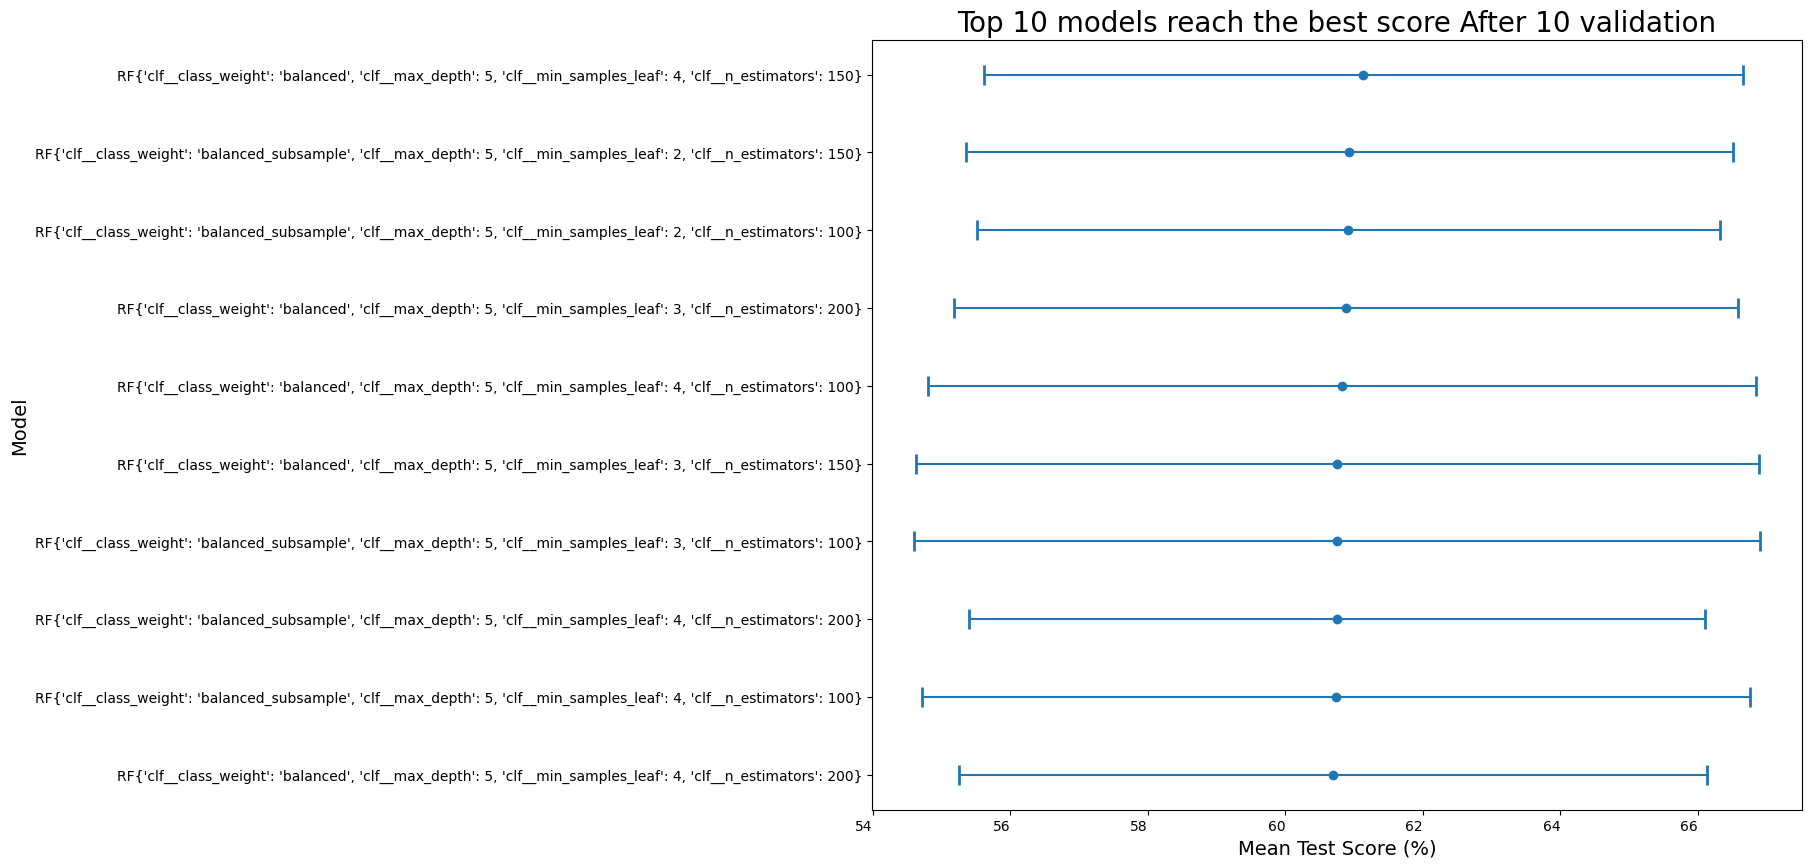

In [278]:
plt.figure(figsize=(12,10))
plt.errorbar(y=y_[::-1], 
             x=mean_[::-1], 
             xerr=std[::-1], 
             linestyle='None', 
             marker='o',
             capsize=7,
             capthick=2)

plt.xticks(ha='right')
plt.xlabel('Mean Test Score (%)',size=14)
plt.ylabel('Model',size=14)
plt.title('Top 10 models reach the best score After 10 validation',size=20,weight=2)
plt.show()

In [279]:
# Best params of Grid search model
grid_search_model.best_params_

{'clf__class_weight': 'balanced',
 'clf__max_depth': 5,
 'clf__min_samples_leaf': 4,
 'clf__n_estimators': 150}

In [280]:
grid_search_model.estimator

Pipeline(steps=[('features',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('rb_scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['rank_diff']),
                                                 ('other_features',
                                                  'passthrough',
                                                  ['home_perf_wm',
                                                   'away_perf_wm',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [426]:
choose_features = ColumnTransformer(
    transformers=[
        ('features', 'passthrough', ['home_perf_wm','away_perf_wm','rank_diff','Home_streak_score', 'Away_streak_score', 'Home_diff_score', 'Away_diff_score'])
    ],
    remainder='drop',
    n_jobs=-1
)

final_rf_model = Pipeline(steps=[
    ('features', choose_features),
    ('oversampling', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42,
                                   n_jobs=-1,
                                   class_weight='balanced',
                                   max_depth=10, 
                                   min_samples_leaf=4, 
                                   n_estimators=150))
])
final_rf_model.fit(X_train,y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('features', 'passthrough',
                                                  ['home_perf_wm',
                                                   'away_perf_wm', 'rank_diff',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=4, n_estimators=150,
                                        n_jobs=-1, random_state=42))])

In [427]:
X_test

,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score
921,-208.55,-1.192261,-0.128270,-0.893618,-0.626365
922,176.10,0.980517,-0.062396,1.630056,-0.231989
923,-441.40,-0.882379,-1.760422,-0.352238,-0.672332
924,-252.93,-0.318862,-0.068937,-0.334212,-0.181265
925,405.34,1.000000,-0.721311,3.423117,-1.403777
...,...,...,...,...,...
978,-133.03,0.979878,0.395191,2.590036,1.032195
979,-106.96,0.054874,0.572759,1.436822,1.393902
980,338.12,0.307864,0.523335,0.762022,0.778454
981,-47.43,0.784536,0.875788,1.393845,1.468319


## Evaluate Params

Start time: Mon Aug 21 17:13:28 2023
Mean ROC AUC: 0.740
Mean Accuracy score: 0.564
Mean F1 score: 0.439 

              precision    recall  f1-score   support

           A       0.50      0.59      0.54        17
           D       0.30      0.23      0.26        13
           H       0.69      0.69      0.69        32

    accuracy                           0.56        62
   macro avg       0.50      0.50      0.50        62
weighted avg       0.55      0.56      0.56        62

Time in running training model: 0.11 min




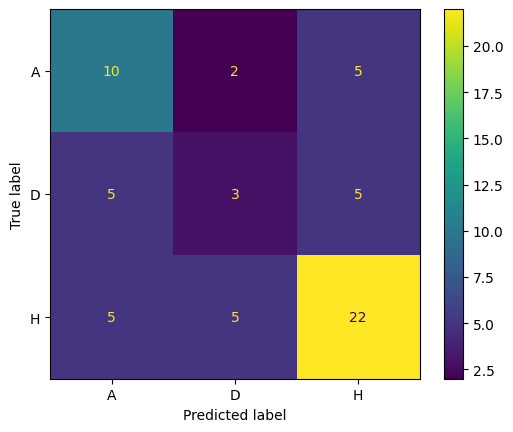

In [429]:
class_ = final_rf_model.classes_
# Set timer
start = time.time()
print("Start time:", time.asctime(time.localtime(start)))
# Cross validation 
cv = 10
# evaluate model
score1 = cross_val_score(final_rf_model, X_test, y_test, scoring='roc_auc_ovr', cv=cv, n_jobs=-1,error_score='raise')
print('Mean ROC AUC: %.3f' % np.mean(score1))

score2 = cross_val_score(final_rf_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy score: %.3f' % np.mean(score2))

score3 = cross_val_score(final_rf_model, X_test, y_test, scoring='f1_macro', cv=cv, n_jobs=-1)
print('Mean F1 score: %.3f \n' % np.mean(score3))



# Classification report 
y_test_prd = final_rf_model.predict(X_test)
print(classification_report(y_test, y_test_prd))
end = time.time()
print(f'Time in running training model: {round((end-start)/60,2)} min\n\n')

# Visual confusion matrix
cm = confusion_matrix(y_true=y_test,y_pred=y_test_prd)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_).plot()
plt.show()

# Create Dataset WC23

In [283]:
# model_path = r"C:\Users\user2\Desktop\Tri Le\Women_WC\model\rf_proba_model.joblib"
# rf_proba_model = joblib.load(model_path)

- Create pickle file

In [24]:
# filename = 'final_rf_model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(final_rf_model, file)

- Load pickle file

# Outright final winner

In [26]:
 filename = 'final_rf_model.pkl'
with open(filename, 'rb') as file:
    final_rf_model = pickle.load(file)

## Creat data WC23

In [27]:
target = 'result'

features = ['home_perf_wm','away_perf_wm','rank_diff','Home_streak_score','Away_streak_score','Home_diff_score','Away_diff_score']
wc_23_filter = final_df['Tournament_id']==16

# Train data
train = final_df[~wc_23_filter].sample(frac=1,random_state=1).reset_index(drop=True)
X_train = train[features]
y_train = train[target]

In [28]:
final_rf_model.fit(X_train,y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('features', 'passthrough',
                                                  ['home_perf_wm',
                                                   'away_perf_wm', 'rank_diff',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=4, n_estimators=150,
                                        n_jobs=-1, random_state=42))])

In [29]:
wc_23 = final_df[final_df['Tournament_id']==16]
wc_23['Date'] = wc_23['Date'].dt.date
wc_23.head()

,Date,Time,Tournament_id,round_id,Home,Away,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,result,pen_result
921,2023-07-20,19:00:00,16,1,New Zealand,Norway,0.278421,0.257009,-208.55,-1.192261,-0.128270,-0.893618,-0.626365,H,0
922,2023-07-20,20:00:00,16,1,Australia,Rep. of Ireland,0.401938,0.326923,176.10,0.980517,-0.062396,1.630056,-0.231989,H,0
923,2023-07-21,12:30:00,16,1,Nigeria,Canada,0.405797,0.432774,-441.40,-0.882379,-1.760422,-0.352238,-0.672332,D,0
924,2023-07-21,17:00:00,16,1,Philippines,Switzerland,0.424242,0.331395,-252.93,-0.318862,-0.068937,-0.334212,-0.181265,A,0
925,2023-07-21,19:30:00,16,1,Spain,Costa Rica,0.923079,0.131209,405.34,1.000000,-0.721311,3.423117,-1.403777,H,0


In [30]:
prob_name = ['prob_'+a for a in final_rf_model.classes_]
wc_23.loc[:,'prediction'] = final_rf_model.predict(wc_23)
wc_23.loc[:,prob_name] = final_rf_model.predict_proba(wc_23)

In [31]:
col = ['Date','Time', 'Tournament_id', 'round_id', 'Home', 'Away', 'home_perf_wm',
       'away_perf_wm', 'rank_diff', 'Home_streak_score', 'Away_streak_score',
       'Home_diff_score', 'Away_diff_score', 'result', 'pen_result',
       'prediction', 'prob_A', 'prob_D', 'prob_H']
wc_23 = wc_23[col]
wc_23

,Date,Time,Tournament_id,round_id,Home,Away,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,result,pen_result,prediction,prob_A,prob_D,prob_H
921,2023-07-20,19:00:00,16,1,New Zealand,Norway,0.278421,0.257009,-208.55,-1.192261,-0.128270,-0.893618,-0.626365,H,0,A,0.489286,0.412704,0.098010
922,2023-07-20,20:00:00,16,1,Australia,Rep. of Ireland,0.401938,0.326923,176.10,0.980517,-0.062396,1.630056,-0.231989,H,0,H,0.229475,0.218932,0.551593
923,2023-07-21,12:30:00,16,1,Nigeria,Canada,0.405797,0.432774,-441.40,-0.882379,-1.760422,-0.352238,-0.672332,D,0,A,0.631970,0.284899,0.083131
924,2023-07-21,17:00:00,16,1,Philippines,Switzerland,0.424242,0.331395,-252.93,-0.318862,-0.068937,-0.334212,-0.181265,A,0,A,0.491114,0.417899,0.090987
925,2023-07-21,19:30:00,16,1,Spain,Costa Rica,0.923079,0.131209,405.34,1.000000,-0.721311,3.423117,-1.403777,H,0,H,0.004957,0.021371,0.973672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2023-08-11,19:30:00,16,3,Japan,Sweden,0.705499,0.501471,-133.03,0.979878,0.395191,2.590036,1.032195,A,0,A,0.466109,0.285868,0.248023
979,2023-08-12,17:00:00,16,3,Australia,France,0.401938,0.387168,-106.96,0.054874,0.572759,1.436822,1.393902,D,H,D,0.334311,0.553348,0.112341
980,2023-08-12,20:30:00,16,3,England,Colombia,0.716496,0.368394,338.12,0.307864,0.523335,0.762022,0.778454,H,0,H,0.062518,0.202096,0.735387
981,2023-08-15,20:00:00,16,4,Spain,Sweden,0.923079,0.501471,-47.43,0.784536,0.875788,1.393845,1.468319,H,0,D,0.225532,0.438716,0.335752


In [ ]:
#1/wc_23[['prob_A','prob_D','prob_H']]

- Although Norway had higher rank than Newzeland 

In [38]:
(wc_23['result'] == wc_23['prediction']).value_counts(normalize=True)

True     0.612903
False    0.387097
Name: proportion, dtype: float64

In [39]:
wc_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 921 to 982
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               62 non-null     object 
 1   Time               62 non-null     object 
 2   Tournament_id      62 non-null     int64  
 3   round_id           62 non-null     int64  
 4   Home               62 non-null     object 
 5   Away               62 non-null     object 
 6   home_perf_wm       62 non-null     float64
 7   away_perf_wm       62 non-null     float64
 8   rank_diff          62 non-null     float64
 9   Home_streak_score  62 non-null     float64
 10  Away_streak_score  62 non-null     float64
 11  Home_diff_score    62 non-null     float64
 12  Away_diff_score    62 non-null     float64
 13  result             62 non-null     object 
 14  pen_result         62 non-null     object 
 15  prediction         62 non-null     object 
 16  prob_A             62 non-null

## Get the winner and start the new round

## Define Function

In [40]:
virtual_result_dfs = list()
def predict_winner(model,
                   virtual_match_data:list,
                   actual_df,
                   feat_eng_pipeline,
                   tournament_id:int=None,
                   round_id:int=None,
                      ):

    # Recalculate probability
    def probability_in_2_ouputs(pro_h,pro_a):
        result = pro_h/(pro_h+pro_a)
        return result
    
    if type(virtual_match_data) == list:
        # Prepare data in case virtual_match_data is dict 
        virtual_match_df = pd.DataFrame(virtual_match_data)
        virtual_match_df['Group_id'] = np.where(virtual_match_df.index<4,1,2).astype(np.int64)
        virtual_match_df['Match_id'] = virtual_match_df.groupby('Group_id',as_index=False).cumcount()
    else:
        virtual_match_df = virtual_match_data

    # Check date of match if match occurred, merge with final data, else get the current date 
    round_id = virtual_match_df['round_id'].unique()[0]
    league_id = virtual_match_df['Tournament_id'].unique()[0]
    
    match_occurred = any((actual_df['Tournament_id']==league_id)&(actual_df['round_id']==round_id))
    if match_occurred:
        fil = (actual_df['Tournament_id']==league_id)&(actual_df['round_id']==round_id)
        true_df = actual_df[fil]
        
        virtual_match_df = pd.merge(left=virtual_match_df,
                                    right=true_df[['Tournament_id','round_id','Home','Away','Date']],
                                    on=['Tournament_id','round_id','Home','Away'],how='left')
        
        # If this round is playing but match is not occuring => fillna with current date
        virtual_match_df['Date'] = virtual_match_df['Date'].fillna(pd.to_datetime(datetime.now().date()))
    else:
        # the round have been occurring in the reality
        virtual_match_df['Date'] = pd.to_datetime(datetime.now().date())

    # transform dataframe
    virtual_match_feat_df = feature_engineer.transform(virtual_match_df)
    
    # Predict the match then combine to dataframe
    virtual_match_feat_df.loc[:,'prediction'] = final_rf_model.predict(virtual_match_feat_df)
    
    # Predict probability then combine to dataframe
    prob_name = ['prob_'+a for a in final_rf_model.classes_]
    virtual_match_feat_df.loc[:,prob_name] = final_rf_model.predict_proba(virtual_match_feat_df)

    if match_occurred:    
        # Compare with actual match
        virtual_result_df = pd.merge(left=virtual_match_feat_df.drop(columns=['Date']), 
                                     right= true_df[['round_id','Home', 'Away','result','pen_result','Date','Time']] ,
                                     on=['round_id','Home','Away'])

        # Eliminate the probability of Draw, only usingh the Home prob or Away prob because this is the knock out stage 
        virtual_result_df['prob_H'] = virtual_result_df['prob_H']/(virtual_result_df['prob_H']+virtual_result_df['prob_A'])
        virtual_result_df['prob_A'] = virtual_result_df['prob_A']/(virtual_result_df['prob_H']+virtual_result_df['prob_A'])
        virtual_result_df['prediction'] = np.where(virtual_result_df['prob_H']>virtual_result_df['prob_A'],'H','A')
        virtual_result_df = virtual_result_df.drop(columns='prob_D')
        
        fil = (virtual_result_df['result'] == virtual_result_df['prediction'])|(virtual_result_df['pen_result'] == virtual_result_df['prediction'])
        virtual_result_df['is_correct'] = np.where(fil,True,False)
    
        # Get the result 
        print(f"the model predict correct {fil.sum()} on {fil.count()} matches")
        print(f" the wrong results are below: \n{virtual_result_df[~fil][['Tournament_id', 'round_id', 'Home', 'Away','prob_H','prob_A','prediction','result', 'pen_result']]}")
        order_col = ['Date', 'Tournament_id', 'round_id','Group_id','Match_id', 'Home', 'Away','prob_H','prob_A','prediction','result', 'pen_result','is_correct']
        return virtual_result_df[order_col]
    else:
        # If the match still does not occur, the match will be double 
        system_calcualte = any(virtual_match_feat_df.duplicated(subset=['Group_id','Match_id']))
        if system_calcualte:
            # Recalcualte the probility of Home and Away because from round 16, there is 2 likelihood occuring: Home win or Away win
            virtual_match_feat_df['prob_H_'] = virtual_match_feat_df[['prob_H','prob_A']].apply(lambda x: probability_in_2_ouputs(pro_h=x['prob_H'],pro_a=x['prob_A']),axis=1)
            virtual_match_feat_df['prob_A_'] = 1- virtual_match_feat_df['prob_H_']
            
            # Create data frame to get which team be able to win from 2 match I created 
            ls_ = list()
            for i, h, a, p_h, p_a in virtual_match_feat_df[['Home','Away', 'prob_H_','prob_A_']].itertuples(index=True,name=None):
                try: 
                    match_dict = dict()
                    if h == virtual_match_feat_df.loc[i+1,'Away'] and a == virtual_match_feat_df.loc[i+1,'Home']:
                        
                        match_dict['Home'] = h
                        match_dict['Away'] = a
                        pro_h_2 = (p_h+virtual_match_feat_df.loc[i+1,'prob_A_'])/2
                        pro_a_2 = (p_a+virtual_match_feat_df.loc[i+1,'prob_H_'])/2
                        match_dict['prob_H'] = pro_h_2
                        match_dict['prob_A'] = pro_a_2
                        if pro_h_2 > pro_a_2:
                            match_dict['prediction'] = 'H'
                        else:
                            match_dict['prediction'] = 'A'
                        
                        ls_.append(match_dict)
                    else:
                        pass
                except Exception as e:
                    break 
    
            # Combine to 2 df to compatible with next fucntion  
            df_prob = pd.DataFrame(ls_)
            virtual_match_feat_df = virtual_match_feat_df.drop_duplicates(subset=['Date','Tournament_id',	'round_id',	'Group_id',	'Match_id'])[['Date','Tournament_id','round_id','Group_id','Match_id','Home','Away']]
            
            return pd.merge(left=virtual_match_feat_df,
                                             right=df_prob,
                                             on=['Home','Away'],
                                             how='outer')
           
        else:
            virtual_match_feat_df['prob_H'] = virtual_match_feat_df[['prob_H','prob_A']].apply(lambda x: probability_in_2_ouputs(pro_h=x['prob_H'],pro_a=x['prob_A']),axis=1)
            virtual_match_feat_df['prob_A'] = 1- virtual_match_feat_df['prob_H']
            virtual_match_feat_df['prediction'] = np.where(virtual_match_feat_df['prob_H']>virtual_match_feat_df['prob_A'],'H','A')
            
        order_col = ['Date', 'Tournament_id', 'round_id','Group_id','Match_id', 'Home', 'Away','prob_H','prob_A','prediction']
        return virtual_match_feat_df[order_col]

In [41]:
def arrange_next_round(virtual_df):
    ls_winner = list()
    # check df columns contain reuslt and pen result or not?
    if 'pen_result' in virtual_df.columns and 'result' in virtual_df.columns:
        print('There is this round in historical data')
        cols = ['Tournament_id', 'round_id','Group_id','Match_id','Home', 'Away', 'result', 'pen_result','prediction']
        match_df =  virtual_df[cols]
        
        # Get winner 
        for t_id , r_id, g_id, m_id, h, a, r, pen_r, prd in match_df.itertuples(index=False,name=None):
            dict_match = dict()
            dict_match['Tournament_id'] = t_id
            dict_match['round_id'] = r_id+1
            dict_match['Group_id'] = g_id
            if m_id %2 == 0:
                dict_match['Match_id'] = 0
            else:
                 dict_match['Match_id'] = 2  
            # Get team winner
            if r == 'A':
                dict_match['winner_team'] = a
            elif r == 'H':
                dict_match['winner_team'] = h
            else:
                if pen_r == 'H':
                    dict_match['winner_team'] = h
                else:
                    dict_match['winner_team'] = a
        
            # add dict to list winner
            ls_winner.append(dict_match)
    else: 
        # In case: This game is virtual
        print('This round still not happens in the reality >> Start to calculate...')
        cols = ['Tournament_id', 'round_id','Group_id','Match_id','Home', 'Away','prediction','prob_H','prob_A']
        match_df =  virtual_df[cols]
        # Get winner 
        for t_id , r_id, g_id, m_id, h, a, prd ,pro_a, pro_h in match_df.itertuples(index=False,name=None):
            dict_match = dict()
            dict_match['Tournament_id'] = t_id
            dict_match['round_id'] = r_id+1
            dict_match['Group_id'] = g_id
            if m_id %2 == 0:
                dict_match['Match_id'] = 0
            else:
                 dict_match['Match_id'] = 2  
            # Get team winner
            if prd == 'A':
                dict_match['winner_team'] = a
            elif prd == 'H':
                dict_match['winner_team'] = h
            else:
                if pro_a > pro_h:
                    dict_match['winner_team'] = a
                else:
                    dict_match['winner_team'] = h
        
            # add dict to list winner
            ls_winner.append(dict_match)

    # Create next round:
    winner_group = pd.DataFrame(ls_winner)

    # In final 2 team head to head => no more group
    if winner_group.shape[0] == 2:
        winner_group['Group_id'] = 0
    
    winner_group = winner_group.groupby(['Tournament_id','round_id','Group_id','Match_id'],as_index=False).agg({'winner_team':list})

    # create next round in 2 way 
    next_round = pd.concat([winner_group.drop(columns='winner_team'), pd.DataFrame(winner_group['winner_team'].tolist(), index=winner_group.index)], axis=1).rename(columns={0:'Home',1:'Away'})
    next_round_revese = pd.concat([winner_group.drop(columns='winner_team'), pd.DataFrame(winner_group['winner_team'].tolist(), index=winner_group.index)], axis=1).rename(columns={1:'Home',0:'Away'})
    comb_next_round = pd.concat([next_round,next_round_revese],axis=0).sort_values(by=['Tournament_id','round_id','Group_id','Match_id'])
    
    return comb_next_round

## Breakdown

In [39]:
fil = (final_df['Tournament_id']==16)&(final_df['round_id']==2)
test = final_df[fil]
#test[(test['Home'].isin(['New Zealand','Norway']))&(test['Away'].isin(['New Zealand','Norway']))]
test

,Date,Time,Tournament_id,round_id,Home,Away,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,result,pen_result
969,2023-08-05,17:00:00,16,2,Switzerland,Spain,0.250000,0.470721,-236.38,0.113448,0.828672,0.145810,2.100347,A,0
970,2023-08-05,20:00:00,16,2,Japan,Norway,0.705499,0.257009,8.43,0.981832,-0.291156,2.427284,0.277406,H,0
971,2023-08-06,12:00:00,16,2,Netherlands,South Africa,0.834743,0.407767,508.95,0.784433,-0.672743,2.360459,-1.583023,H,0
972,2023-08-06,19:00:00,16,2,Sweden,USA,0.691021,0.555556,-40.32,0.402766,0.774203,1.028841,1.266258,D,H
973,2023-08-07,17:30:00,16,2,England,Nigeria,0.716496,0.404348,485.82,0.381586,0.788407,0.730879,0.685038,D,H
974,2023-08-07,20:30:00,16,2,Australia,Denmark,0.401938,0.470486,53.44,-0.539729,0.838139,0.929312,0.338295,H,0
975,2023-08-08,18:00:00,16,2,Colombia,Jamaica,0.707407,0.372564,165.83,0.317576,0.152777,0.483141,0.342735,H,0
976,2023-08-08,20:30:00,16,2,France,Morocco,0.864925,0.303333,692.57,0.382308,0.616194,1.031124,-0.314174,H,0


In [40]:
fil = (final_df['Tournament_id']==16)&(final_df['round_id']==2)
test = final_df[fil]
col_vir_round = ['Tournament_id', 'round_id', 'Group_id', 'Match_id','Home', 'Away']
virtual_match =  test[['Tournament_id', 'round_id','Home', 'Away']].reset_index(drop=True)
virtual_match

,Tournament_id,round_id,Home,Away
0,16,2,Switzerland,Spain
1,16,2,Japan,Norway
2,16,2,Netherlands,South Africa
3,16,2,Sweden,USA
4,16,2,England,Nigeria
5,16,2,Australia,Denmark
6,16,2,Colombia,Jamaica
7,16,2,France,Morocco


In [41]:
match_list = [{'Tournament_id':16, 
               'round_id':2,
               'Home':h,
               'Away':a} for h, a in virtual_match[['Home', 'Away']].itertuples(index=False,name=None)]
match_list

[{'Tournament_id': 16, 'round_id': 2, 'Home': 'Switzerland', 'Away': 'Spain'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Japan', 'Away': 'Norway'},
 {'Tournament_id': 16,
  'round_id': 2,
  'Home': 'Netherlands',
  'Away': 'South Africa'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Sweden', 'Away': 'USA'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'England', 'Away': 'Nigeria'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Australia', 'Away': 'Denmark'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Colombia', 'Away': 'Jamaica'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'France', 'Away': 'Morocco'}]

In [43]:
match_list = [
    {'Tournament_id': 16, 'round_id': 2, 'Home': 'Switzerland', 'Away': 'Spain'},
    {'Tournament_id': 16, 'round_id': 2, 'Home': 'Japan', 'Away': 'Norway'},
    {'Tournament_id': 16,'round_id': 2,'Home': 'Netherlands','Away': 'South Africa'},
    {'Tournament_id': 16, 'round_id': 2, 'Home': 'Sweden', 'Away': 'USA'},
    {'Tournament_id': 16, 'round_id': 2, 'Home': 'England', 'Away': 'Nigeria'},
    {'Tournament_id': 16, 'round_id': 2, 'Home': 'Australia', 'Away': 'Denmark'},
    {'Tournament_id': 16, 'round_id': 2, 'Home': 'Colombia', 'Away': 'Jamaica'},
    {'Tournament_id': 16, 'round_id': 2, 'Home': 'France', 'Away': 'Morocco'}
]

virtual_match_df = pd.DataFrame(match_list)
virtual_match_df['Group_id'] = np.where(virtual_match_df.index<4,1,2).astype(np.int64)
virtual_match_df['Match_id'] = virtual_match_df.groupby('Group_id',as_index=False).cumcount()


# Check date of match if match occurred, merge with final data, else get the current date 
round_id = virtual_match_df['round_id'].unique()[0]
league_id = virtual_match_df['Tournament_id'].unique()[0]
match_occurred = any((final_df['Tournament_id']==league_id)&(final_df['round_id']==round_id))
if match_occurred:
    virtual_match_df = pd.merge(left=virtual_match_df,
                                right=final_df[['Tournament_id','round_id','Home','Away','Date']],
                                on=['Tournament_id','round_id','Home','Away'],how='left')
    
    # If this round is playing but match is not occuring => fillna with current date
    virtual_match_df['Date'] = virtual_match_df['Date'].fillna(pd.to_datetime(datetime.now().date()))
else:
    virtual_match_df['Date'] = pd.to_datetime(datetime.now().date())

virtual_match_df

,Tournament_id,round_id,Home,Away,Group_id,Match_id,Date
0,16,2,Switzerland,Spain,1,0,2023-08-05
1,16,2,Japan,Norway,1,1,2023-08-05
2,16,2,Netherlands,South Africa,1,2,2023-08-06
3,16,2,Sweden,USA,1,3,2023-08-06
4,16,2,England,Nigeria,2,0,2023-08-07
5,16,2,Australia,Denmark,2,1,2023-08-07
6,16,2,Colombia,Jamaica,2,2,2023-08-08
7,16,2,France,Morocco,2,3,2023-08-08


In [114]:
# print(pd.to_datetime(pd.Timestamp.now(), 
#                format='%Y-%m-%d', 
#                errors='coerce', 
#                infer_datetime_format=True, origin='unix'))
# print(pd.Timestamp.now())
# pd.to_datetime(datetime.now().date())

In [44]:
virtual_match_feat_df = feature_engineer.transform(virtual_match_df)
virtual_match_feat_df


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().



,Tournament_id,round_id,Home,Away,Group_id,Match_id,Date,home_rank,home_point,away_rank,away_point,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_streak_length,Away_streak_length,Home_diff_score,Away_diff_score
0,16,2,Switzerland,Spain,1,0,2023-08-05,20,1765.90,6,2002.28,0.250000,0.470721,-236.38,0.113448,0.828672,6,6,0.145810,2.100347
1,16,2,Japan,Norway,1,1,2023-08-05,11,1916.68,12,1908.25,0.705499,0.257009,8.43,0.981832,-0.291156,6,6,2.427284,0.277406
2,16,2,Netherlands,South Africa,1,2,2023-08-06,9,1980.47,54,1471.52,0.834743,0.407767,508.95,0.784433,-0.672743,6,6,2.360459,-1.583023
3,16,2,Sweden,USA,1,3,2023-08-06,3,2049.71,1,2090.03,0.691021,0.555556,-40.32,0.402766,0.774203,6,6,1.028841,1.266258
4,16,2,England,Nigeria,2,0,2023-08-07,4,2040.76,40,1554.94,0.716496,0.404348,485.82,0.381586,0.788407,6,6,0.730879,0.685038
5,16,2,Australia,Denmark,2,1,2023-08-07,10,1919.69,13,1866.25,0.401938,0.470486,53.44,-0.539729,0.838139,6,6,0.929312,0.338295
6,16,2,Colombia,Jamaica,2,2,2023-08-08,25,1702.64,43,1536.81,0.707407,0.372564,165.83,0.317576,0.152777,6,6,0.483141,0.342735
7,16,2,France,Morocco,2,3,2023-08-08,5,2026.65,72,1334.08,0.864925,0.303333,692.57,0.382308,0.616194,6,6,1.031124,-0.314174


In [45]:
virtual_result_list = list()
# Predict the match then combine to dataframe
virtual_match_feat_df.loc[:,'prediction'] = final_rf_model.predict(virtual_match_feat_df)

# Predict probability then combine to dataframe
prob_name = ['prob_'+a for a in final_rf_model.classes_]
virtual_match_feat_df.loc[:,prob_name] = final_rf_model.predict_proba(virtual_match_feat_df)

# filter match to get true label
round_id = virtual_match_feat_df['round_id'].unique()[0]
league_id = virtual_match_feat_df['Tournament_id'].unique()[0]
fil = (final_df['Tournament_id']==league_id)&(final_df['round_id']==round_id)
true_df = final_df[fil]

# Compare with actual match
virtual_result_df = pd.merge(left=virtual_match_feat_df.drop(columns=['Date']), 
                             right= true_df[['round_id','Home', 'Away','result','pen_result','Date','Time']] ,
                             on=['round_id','Home','Away'])

fil = (virtual_result_df['result'] == virtual_result_df['prediction'])
virtual_result_df['is_correct'] = np.where(fil,True,False)
print(f"the model predict correct {fil.sum()} on {fil.count()} matches")
print(f" the wrong results are below: \n{virtual_result_df[~fil][['Tournament_id', 'round_id', 'Home', 'Away','prob_A', 'prob_D','prob_H','prediction','result', 'pen_result']]}")
order_col = ['Date', 'Tournament_id', 'round_id','Group_id','Match_id', 'Home', 'Away','prob_A', 'prob_D','prob_H','prediction','result', 'pen_result','is_correct']
virtual_result_df[order_col]

the model predict correct 4 on 8 matches
 the wrong results are below: 
   Tournament_id  round_id       Home     Away    prob_A    prob_D    prob_H  \
1             16         2      Japan   Norway  0.178192  0.529350  0.292458   
3             16         2     Sweden      USA  0.654332  0.198575  0.147092   
4             16         2    England  Nigeria  0.046251  0.212799  0.740950   
5             16         2  Australia  Denmark  0.403098  0.439653  0.157249   

  prediction result pen_result  
1          D      H          0  
3          A      D          H  
4          H      D          H  
5          D      H          0  


,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_A,prob_D,prob_H,prediction,result,pen_result,is_correct
0,2023-08-05,16,2,1,0,Switzerland,Spain,0.690191,0.277771,0.032038,A,A,0,True
1,2023-08-05,16,2,1,1,Japan,Norway,0.178192,0.529350,0.292458,D,H,0,False
2,2023-08-06,16,2,1,2,Netherlands,South Africa,0.027746,0.050458,0.921796,H,H,0,True
3,2023-08-06,16,2,1,3,Sweden,USA,0.654332,0.198575,0.147092,A,D,H,False
4,2023-08-07,16,2,2,0,England,Nigeria,0.046251,0.212799,0.740950,H,D,H,False
5,2023-08-07,16,2,2,1,Australia,Denmark,0.403098,0.439653,0.157249,D,H,0,False
6,2023-08-08,16,2,2,2,Colombia,Jamaica,0.135556,0.366286,0.498159,H,H,0,True
7,2023-08-08,16,2,2,3,France,Morocco,0.022710,0.115397,0.861893,H,H,0,True


In [46]:
cols = ['Tournament_id', 'round_id','Group_id','Match_id','Home', 'Away', 'result', 'pen_result','prediction']
virtual_result_df[cols]

,Tournament_id,round_id,Group_id,Match_id,Home,Away,result,pen_result,prediction
0,16,2,1,0,Switzerland,Spain,A,0,A
1,16,2,1,1,Japan,Norway,H,0,D
2,16,2,1,2,Netherlands,South Africa,H,0,H
3,16,2,1,3,Sweden,USA,D,H,A
4,16,2,2,0,England,Nigeria,D,H,H
5,16,2,2,1,Australia,Denmark,H,0,D
6,16,2,2,2,Colombia,Jamaica,H,0,H
7,16,2,2,3,France,Morocco,H,0,H


In [47]:
ls_winner = list()

for t_id , r_id, g_id, m_id, h, a, r, pen_r, prd in virtual_result_df[cols].itertuples(index=False,name=None):
    dict_match = dict()
    dict_match['Tournament_id'] = t_id
    dict_match['round_id'] = r_id+1
    dict_match['Group_id'] = g_id
    if m_id %2 == 0:
        dict_match['Match_id'] = 0
    else:
         dict_match['Match_id'] = 1  

    # Get team winner
    if r == 'A':
        dict_match['winner_team'] = a
    elif r == 'H':
        dict_match['winner_team'] = h
    else:
        if pen_r == 'H':
            dict_match['winner_team'] = h
        else:
            dict_match['winner_team'] = a

    # add dict to list winner
    ls_winner.append(dict_match)
        

In [48]:
winner_group = pd.DataFrame(ls_winner)
winner_group

,Tournament_id,round_id,Group_id,Match_id,winner_team
0,16,3,1,0,Spain
1,16,3,1,1,Japan
2,16,3,1,0,Netherlands
3,16,3,1,1,Sweden
4,16,3,2,0,England
5,16,3,2,1,Australia
6,16,3,2,0,Colombia
7,16,3,2,1,France


In [49]:
winner_group = winner_group.groupby(['Tournament_id','round_id','Group_id','Match_id'],as_index=False).agg({'winner_team':list})
winner_group

,Tournament_id,round_id,Group_id,Match_id,winner_team
0,16,3,1,0,"[Spain, Netherlands]"
1,16,3,1,1,"[Japan, Sweden]"
2,16,3,2,0,"[England, Colombia]"
3,16,3,2,1,"[Australia, France]"


In [50]:
x = pd.concat([winner_group.drop(columns='winner_team'), pd.DataFrame(winner_group['winner_team'].tolist(), index=winner_group.index)], axis=1).rename(columns={0:'Home',1:'Away'})
y = pd.concat([winner_group.drop(columns='winner_team'), pd.DataFrame(winner_group['winner_team'].tolist(), index=winner_group.index)], axis=1).rename(columns={1:'Home',0:'Away'})
pd.concat([x,y],axis=0).sort_values(by=['Tournament_id','round_id','Group_id','Match_id'])

,Tournament_id,round_id,Group_id,Match_id,Home,Away
0,16,3,1,0,Spain,Netherlands
0,16,3,1,0,Netherlands,Spain
1,16,3,1,1,Japan,Sweden
1,16,3,1,1,Sweden,Japan
2,16,3,2,0,England,Colombia
2,16,3,2,0,Colombia,England
3,16,3,2,1,Australia,France
3,16,3,2,1,France,Australia


## Apply Function

In [42]:
fil = (final_df['Tournament_id']==16)&(final_df['round_id']==2)
test = final_df[fil]
col_vir_round = ['Tournament_id', 'round_id', 'Group_id', 'Match_id','Home', 'Away']
virtual_match =  test[['Tournament_id', 'round_id','Home', 'Away']].reset_index(drop=True)
virtual_match

,Tournament_id,round_id,Home,Away
0,16,2,Switzerland,Spain
1,16,2,Japan,Norway
2,16,2,Netherlands,South Africa
3,16,2,Sweden,USA
4,16,2,England,Nigeria
5,16,2,Australia,Denmark
6,16,2,Colombia,Jamaica
7,16,2,France,Morocco


### Prepare data of round 16

- real

In [43]:
match_list = [{'Tournament_id':16, 
               'round_id':2,
               'Home':h,
               'Away':a} for h, a in virtual_match[['Home', 'Away']].itertuples(index=False,name=None)]
match_list

[{'Tournament_id': 16, 'round_id': 2, 'Home': 'Switzerland', 'Away': 'Spain'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Japan', 'Away': 'Norway'},
 {'Tournament_id': 16,
  'round_id': 2,
  'Home': 'Netherlands',
  'Away': 'South Africa'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Sweden', 'Away': 'USA'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'England', 'Away': 'Nigeria'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Australia', 'Away': 'Denmark'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Colombia', 'Away': 'Jamaica'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'France', 'Away': 'Morocco'}]

- Virtual

In [44]:
virtual_match_list = [{'Tournament_id':17, 
               'round_id':2,
               'Home':h,
               'Away':a} for h, a in virtual_match[['Home', 'Away']].itertuples(index=False,name=None)]
virtual_match_list

[{'Tournament_id': 17, 'round_id': 2, 'Home': 'Switzerland', 'Away': 'Spain'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Japan', 'Away': 'Norway'},
 {'Tournament_id': 17,
  'round_id': 2,
  'Home': 'Netherlands',
  'Away': 'South Africa'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Sweden', 'Away': 'USA'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'England', 'Away': 'Nigeria'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Australia', 'Away': 'Denmark'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Colombia', 'Away': 'Jamaica'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'France', 'Away': 'Morocco'}]

#### Result in Round 16  

- Real 

In [45]:
round_16_result = predict_winner(model=final_rf_model,
                           virtual_match_data=match_list,
                           actual_df=final_df,
                           feat_eng_pipeline=feature_engineer)


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().

the model predict correct 6 on 8 matches
 the wrong results are below: 
   Tournament_id  round_id       Home     Away    prob_H    prob_A prediction  \
3             16         2     Sweden      USA  0.236753  0.706578          A   
5             16         2  Australia  Denmark  0.225287  0.690413          A   

  result pen_result  
3      D          H  
5      H          0  


In [46]:
round_16_result

,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction,result,pen_result,is_correct
0,2023-08-05,16,2,1,0,Switzerland,Spain,0.043426,0.938252,A,A,0,True
1,2023-08-05,16,2,1,1,Japan,Norway,0.664937,0.193449,H,H,0,True
2,2023-08-06,16,2,1,2,Netherlands,South Africa,0.981548,0.017900,H,H,0,True
3,2023-08-06,16,2,1,3,Sweden,USA,0.236753,0.706578,A,D,H,False
4,2023-08-07,16,2,2,0,England,Nigeria,0.914892,0.070584,H,D,H,True
5,2023-08-07,16,2,2,1,Australia,Denmark,0.225287,0.690413,A,H,0,False
6,2023-08-08,16,2,2,2,Colombia,Jamaica,0.777678,0.155933,H,H,0,True
7,2023-08-08,16,2,2,3,France,Morocco,0.943996,0.052210,H,H,0,True


- Virtual  

In [47]:
round_16_virtual = predict_winner(model=final_rf_model,
                           virtual_match_data=virtual_match_list,
                           actual_df=final_df,
                           feat_eng_pipeline=feature_engineer)


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().



In [48]:
round_16_virtual

,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
0,2023-08-22,17,2,1,0,Switzerland,Spain,0.073037,0.926963,A
1,2023-08-22,17,2,1,1,Japan,Norway,0.698594,0.301406,H
2,2023-08-22,17,2,1,2,Netherlands,South Africa,0.981158,0.018842,H
3,2023-08-22,17,2,1,3,Sweden,USA,0.293311,0.706689,A
4,2023-08-22,17,2,2,0,England,Nigeria,0.925638,0.074362,H
5,2023-08-22,17,2,2,1,Australia,Denmark,0.242937,0.757063,A
6,2023-08-22,17,2,2,2,Colombia,Jamaica,0.820315,0.179685,H
7,2023-08-22,17,2,2,3,France,Morocco,0.946881,0.053119,H


### Prepare data of quater final round 

- Real 

In [49]:
quater_final_real = arrange_next_round(round_16_result)
quater_final_real

There is this round in historical data


,Tournament_id,round_id,Group_id,Match_id,Home,Away
0,16,3,1,0,Spain,Netherlands
0,16,3,1,0,Netherlands,Spain
1,16,3,1,2,Japan,Sweden
1,16,3,1,2,Sweden,Japan
2,16,3,2,0,England,Colombia
2,16,3,2,0,Colombia,England
3,16,3,2,2,Australia,France
3,16,3,2,2,France,Australia


- virtual

In [50]:
quater_final_vir = arrange_next_round(round_16_virtual)
quater_final_vir

This round still not happens in the reality >> Start to calculate...


,Tournament_id,round_id,Group_id,Match_id,Home,Away
0,17,3,1,0,Spain,Netherlands
0,17,3,1,0,Netherlands,Spain
1,17,3,1,2,Japan,USA
1,17,3,1,2,USA,Japan
2,17,3,2,0,England,Colombia
2,17,3,2,0,Colombia,England
3,17,3,2,2,Denmark,France
3,17,3,2,2,France,Denmark


#### Result in Quater final round  

- Real

In [51]:
quater_final_winner = predict_winner(model=final_rf_model,
                                       virtual_match_data=quater_final_real,
                                       actual_df=final_df,
                                       feat_eng_pipeline=feature_engineer)
quater_final_winner


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().

the model predict correct 3 on 4 matches
 the wrong results are below: 
   Tournament_id  round_id       Home    Away    prob_H    prob_A prediction  \
3             16         3  Australia  France  0.251518  0.570663          A   

  result pen_result  
3      D          H  


,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction,result,pen_result,is_correct
0,2023-08-11,16,3,1,0,Spain,Netherlands,0.735102,0.189478,H,H,0,True
1,2023-08-11,16,3,1,2,Japan,Sweden,0.347307,0.573027,A,A,0,True
2,2023-08-12,16,3,2,0,England,Colombia,0.921648,0.063523,H,H,0,True
3,2023-08-12,16,3,2,2,Australia,France,0.251518,0.570663,A,D,H,False


- Virtual

In [52]:
quater_final_virtual_winner = predict_winner(model=final_rf_model,
                                       virtual_match_data=quater_final_vir,
                                       actual_df=final_df,
                                       feat_eng_pipeline=feature_engineer)
quater_final_virtual_winner


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().



,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
0,2023-08-22,17,3,1,0,Spain,Netherlands,0.500159,0.499841,H
1,2023-08-22,17,3,1,2,Japan,USA,0.244999,0.755001,A
2,2023-08-22,17,3,2,0,England,Colombia,0.892500,0.107500,H
3,2023-08-22,17,3,2,2,Denmark,France,0.270438,0.729562,A


### Prepare data of Semi final  

- Real 

In [53]:
semi_final_real = arrange_next_round(quater_final_winner)
semi_final_real

There is this round in historical data


,Tournament_id,round_id,Group_id,Match_id,Home,Away
0,16,4,1,0,Spain,Sweden
0,16,4,1,0,Sweden,Spain
1,16,4,2,0,England,Australia
1,16,4,2,0,Australia,England


- virtual

In [54]:
semi_final_virtual = arrange_next_round(quater_final_virtual_winner)
semi_final_virtual

This round still not happens in the reality >> Start to calculate...


,Tournament_id,round_id,Group_id,Match_id,Home,Away
0,17,4,1,0,Spain,USA
0,17,4,1,0,USA,Spain
1,17,4,2,0,England,France
1,17,4,2,0,France,England


#### Result in Semi final round  

- Real

In [55]:
semi_final_winner = predict_winner(model=final_rf_model,
                                       virtual_match_data=semi_final_real,
                                       actual_df=final_df,
                                       feat_eng_pipeline=feature_engineer)
semi_final_winner


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().

the model predict correct 2 on 2 matches
 the wrong results are below: 
Empty DataFrame
Columns: [Tournament_id, round_id, Home, Away, prob_H, prob_A, prediction, result, pen_result]
Index: []


,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction,result,pen_result,is_correct
0,2023-08-15,16,4,1,0,Spain,Sweden,0.598186,0.273798,H,H,0,True
1,2023-08-16,16,4,2,0,Australia,England,0.108315,0.856259,A,A,0,True


- Virtual

In [56]:
semi_virtual_winner = predict_winner(model=final_rf_model,
                                       virtual_match_data=semi_final_virtual,
                                       actual_df=final_df,
                                       feat_eng_pipeline=feature_engineer)
semi_virtual_winner


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().



,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
0,2023-08-22,17,4,1,0,Spain,USA,0.390285,0.609715,A
1,2023-08-22,17,4,2,0,England,France,0.500621,0.499379,H


### Prepare data of Final

- Real 

In [57]:
final_real = arrange_next_round(semi_final_winner)
final_real

There is this round in historical data


,Tournament_id,round_id,Group_id,Match_id,Home,Away
0,16,5,0,0,Spain,England
0,16,5,0,0,England,Spain


- virtual

In [58]:
final_virtual = arrange_next_round(semi_virtual_winner)
final_virtual

This round still not happens in the reality >> Start to calculate...


,Tournament_id,round_id,Group_id,Match_id,Home,Away
0,17,5,0,0,USA,England
0,17,5,0,0,England,USA


#### Result in final round  

- Real

In [59]:
final_winner = predict_winner(model=final_rf_model,
                                       virtual_match_data=final_real,
                                       actual_df=final_df,
                                       feat_eng_pipeline=feature_engineer)
final_winner


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().



,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
0,2023-08-22,16,5,0,0,Spain,England,0.564992,0.435008,H


- Virtual

In [60]:
final_virtual_winner = predict_winner(model=final_rf_model,
                                       virtual_match_data=final_virtual,
                                       actual_df=final_df,
                                       feat_eng_pipeline=feature_engineer)
final_virtual_winner


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().



,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
0,2023-08-22,17,5,0,0,USA,England,0.62202,0.37798,H


## Compare real final and virtual final 

In [61]:
final_winner

,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
0,2023-08-22,16,5,0,0,Spain,England,0.564992,0.435008,H


In [62]:
final_virtual_winner

,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
0,2023-08-22,17,5,0,0,USA,England,0.62202,0.37798,H


In [63]:
final_df[(final_df['Home'].isin(['Spain','England']))&(final_df['Away'].isin(['Spain','England']))]

,Date,Time,Tournament_id,round_id,Home,Away,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,result,pen_result
596,2022-07-20,20:00:00,15,2,England,Spain,0.716496,0.470721,38.48,1.0,0.73251,4.181217,1.807951,H,0


## Build a loop 

## Real data from round 16

In [64]:
next_round = [{'Tournament_id':16, 
               'round_id':2,
               'Home':h,
               'Away':a} for h, a in virtual_match[['Home', 'Away']].itertuples(index=False,name=None)]
next_round

[{'Tournament_id': 16, 'round_id': 2, 'Home': 'Switzerland', 'Away': 'Spain'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Japan', 'Away': 'Norway'},
 {'Tournament_id': 16,
  'round_id': 2,
  'Home': 'Netherlands',
  'Away': 'South Africa'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Sweden', 'Away': 'USA'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'England', 'Away': 'Nigeria'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Australia', 'Away': 'Denmark'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'Colombia', 'Away': 'Jamaica'},
 {'Tournament_id': 16, 'round_id': 2, 'Home': 'France', 'Away': 'Morocco'}]

In [65]:
list_virtual_dfs = list()
for i in range(0,4):
    winner_df = predict_winner(model=final_rf_model,
                           virtual_match_data=next_round,
                           actual_df=final_df,
                           feat_eng_pipeline=feature_engineer)
    
    list_virtual_dfs.append(winner_df)
    next_round = arrange_next_round(winner_df)
    print("shape of next_round", next_round.shape)


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().

the model predict correct 6 on 8 matches
 the wrong results are below: 
   Tournament_id  round_id       Home     Away    prob_H    prob_A prediction  \
3             16         2     Sweden      USA  0.236753  0.706578          A   
5             16         2  Australia  Denmark  0.225287  0.690413          A   

  result pen_result  
3      D          H  
5      H          0  
There is this round in historical data
shape of next_round (8, 6)

>>>>Merge_rank_league_perform.transform() called.

Connec

In [66]:
real_full_matches = pd.concat(list_virtual_dfs)
real_full_matches

,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction,result,pen_result,is_correct
0,2023-08-05,16,2,1,0,Switzerland,Spain,0.043426,0.938252,A,A,0,True
1,2023-08-05,16,2,1,1,Japan,Norway,0.664937,0.193449,H,H,0,True
2,2023-08-06,16,2,1,2,Netherlands,South Africa,0.981548,0.017900,H,H,0,True
3,2023-08-06,16,2,1,3,Sweden,USA,0.236753,0.706578,A,D,H,False
4,2023-08-07,16,2,2,0,England,Nigeria,0.914892,0.070584,H,D,H,True
5,2023-08-07,16,2,2,1,Australia,Denmark,0.225287,0.690413,A,H,0,False
6,2023-08-08,16,2,2,2,Colombia,Jamaica,0.777678,0.155933,H,H,0,True
7,2023-08-08,16,2,2,3,France,Morocco,0.943996,0.052210,H,H,0,True
0,2023-08-11,16,3,1,0,Spain,Netherlands,0.735102,0.189478,H,H,0,True
1,2023-08-11,16,3,1,2,Japan,Sweden,0.347307,0.573027,A,A,0,True


## Virtual matches from round 16

In [67]:
next_round_virtual = [{'Tournament_id':17, 
                   'round_id':2,
                   'Home':h,
                   'Away':a} for h, a in virtual_match[['Home', 'Away']].itertuples(index=False,name=None)]
next_round_virtual

[{'Tournament_id': 17, 'round_id': 2, 'Home': 'Switzerland', 'Away': 'Spain'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Japan', 'Away': 'Norway'},
 {'Tournament_id': 17,
  'round_id': 2,
  'Home': 'Netherlands',
  'Away': 'South Africa'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Sweden', 'Away': 'USA'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'England', 'Away': 'Nigeria'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Australia', 'Away': 'Denmark'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Colombia', 'Away': 'Jamaica'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'France', 'Away': 'Morocco'}]

In [68]:
list_virtual_dfs = list()
for i in range(0,4):
    winner_df = predict_winner(model=final_rf_model,
                           virtual_match_data=next_round_virtual,
                           actual_df=final_df,
                           feat_eng_pipeline=feature_engineer)
    
    list_virtual_dfs.append(winner_df)
    next_round_virtual = arrange_next_round(winner_df)
    print("shape of next_round", next_round.shape)


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().

This round still not happens in the reality >> Start to calculate...
shape of next_round (2, 6)

>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform(

In [69]:
virtual_full_matches = pd.concat(list_virtual_dfs)
virtual_full_matches

,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
0,2023-08-22,17,2,1,0,Switzerland,Spain,0.073037,0.926963,A
1,2023-08-22,17,2,1,1,Japan,Norway,0.698594,0.301406,H
2,2023-08-22,17,2,1,2,Netherlands,South Africa,0.981158,0.018842,H
3,2023-08-22,17,2,1,3,Sweden,USA,0.293311,0.706689,A
4,2023-08-22,17,2,2,0,England,Nigeria,0.925638,0.074362,H
5,2023-08-22,17,2,2,1,Australia,Denmark,0.242937,0.757063,A
6,2023-08-22,17,2,2,2,Colombia,Jamaica,0.820315,0.179685,H
7,2023-08-22,17,2,2,3,France,Morocco,0.946881,0.053119,H
0,2023-08-22,17,3,1,0,Spain,Netherlands,0.500159,0.499841,H
1,2023-08-22,17,3,1,2,Japan,USA,0.244999,0.755001,A


In [70]:
real_full_matches

,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction,result,pen_result,is_correct
0,2023-08-05,16,2,1,0,Switzerland,Spain,0.043426,0.938252,A,A,0,True
1,2023-08-05,16,2,1,1,Japan,Norway,0.664937,0.193449,H,H,0,True
2,2023-08-06,16,2,1,2,Netherlands,South Africa,0.981548,0.017900,H,H,0,True
3,2023-08-06,16,2,1,3,Sweden,USA,0.236753,0.706578,A,D,H,False
4,2023-08-07,16,2,2,0,England,Nigeria,0.914892,0.070584,H,D,H,True
5,2023-08-07,16,2,2,1,Australia,Denmark,0.225287,0.690413,A,H,0,False
6,2023-08-08,16,2,2,2,Colombia,Jamaica,0.777678,0.155933,H,H,0,True
7,2023-08-08,16,2,2,3,France,Morocco,0.943996,0.052210,H,H,0,True
0,2023-08-11,16,3,1,0,Spain,Netherlands,0.735102,0.189478,H,H,0,True
1,2023-08-11,16,3,1,2,Japan,Sweden,0.347307,0.573027,A,A,0,True


In [71]:
team_H = real_full_matches[['Home','round_id','prob_H']].rename(columns={'Home':'Team', 'prob_H':'Probability'})
team_A = real_full_matches[['Away','round_id','prob_A']].rename(columns={'Away':'Team', 'prob_A':'Probability'})
team = pd.concat([team_H,team_A],axis=0,ignore_index=True)
(pd.pivot_table(data=team,index='Team',columns='round_id',values='Probability')
 .rename(columns={2:'round_16',3:'quater_final',4:'semi_final',5:'final'})
 .sort_values(by=['final','semi_final','quater_final','round_16'],ascending=False))

round_id,round_16,quater_final,semi_final,final
Team,,,,
Spain,0.938252,0.735102,0.598186,0.564992
England,0.914892,0.921648,0.856259,0.435008
Sweden,0.236753,0.573027,0.273798,NaN
Australia,0.225287,0.251518,0.108315,NaN
France,0.943996,0.570663,NaN,NaN
Japan,0.664937,0.347307,NaN,NaN
Netherlands,0.981548,0.189478,NaN,NaN
Colombia,0.777678,0.063523,NaN,NaN
USA,0.706578,NaN,NaN,NaN


In [72]:
team_H = virtual_full_matches[['Home','round_id','prob_H']].rename(columns={'Home':'Team', 'prob_H':'Probability'})
team_A = virtual_full_matches[['Away','round_id','prob_A']].rename(columns={'Away':'Team', 'prob_A':'Probability'})
team = pd.concat([team_H,team_A],axis=0,ignore_index=True)

(pd.pivot_table(data=team,index='Team',columns='round_id',values='Probability')
 .rename(columns={2:'round_16',3:'quater_final',4:'semi_final',5:'final'})
 .sort_values(by=['final','semi_final','quater_final','round_16'],ascending=False))

round_id,round_16,quater_final,semi_final,final
Team,,,,
USA,0.706689,0.755001,0.609715,0.62202
England,0.925638,0.892500,0.500621,0.37798
France,0.946881,0.729562,0.499379,NaN
Spain,0.926963,0.500159,0.390285,NaN
Netherlands,0.981158,0.499841,NaN,NaN
Denmark,0.757063,0.270438,NaN,NaN
Japan,0.698594,0.244999,NaN,NaN
Colombia,0.820315,0.107500,NaN,NaN
Norway,0.301406,NaN,NaN,NaN


In [73]:
final_df[(final_df['Home'].isin(['USA']))|(final_df['Away'].isin(['USA']))]

,Date,Time,Tournament_id,round_id,Home,Away,home_perf_wm,away_perf_wm,rank_diff,Home_streak_score,Away_streak_score,Home_diff_score,Away_diff_score,result,pen_result
0,2019-07-02,21:00:00,5,4,England,USA,0.716496,0.555556,-49.27,1.000000,1.000000,1.990424,3.429089,A,0
3,2019-07-07,17:00:00,5,6,USA,Netherlands,0.910757,0.479614,109.56,1.000000,1.154977,2.974879,1.293187,H,0
106,2021-04-10,19:10:00,7,1,Sweden,USA,0.691021,0.555556,-40.32,0.932077,1.000000,3.471307,2.320139,D,0
121,2021-04-13,21:00:00,7,1,France,USA,0.864925,0.555556,-63.38,0.896305,0.961130,2.839527,2.131395,A,0
130,2021-06-10,19:38:00,7,1,USA,Portugal,0.910757,0.237342,344.90,0.961130,0.241695,2.310448,0.290363,H,0
155,2021-06-16,20:07:00,7,1,USA,Nigeria,0.910757,0.404348,535.09,0.977305,-0.526904,2.645127,0.975620,H,0
156,2021-07-01,19:38:00,7,1,USA,Mexico,0.910757,0.234421,468.23,0.979047,-0.779808,2.340539,-0.805738,H,0
158,2021-07-05,17:08:00,7,1,USA,Mexico,0.910757,0.234421,468.23,0.979892,-0.858969,2.003681,-1.244562,H,0
239,2021-10-21,19:00:00,7,1,USA,Korea Rep,0.910757,0.229503,249.76,1.000000,-0.023033,5.096876,0.683675,D,0
277,2021-10-26,19:00:00,7,1,USA,Korea Rep,0.910757,0.229503,249.76,0.913607,-0.019945,4.249714,0.572470,H,0


# Run Monte Carlo simulation 

In [74]:
fil = (final_df['Tournament_id']==16)&(final_df['round_id']==2)
test = final_df[fil]
col_vir_round = ['Tournament_id', 'round_id', 'Group_id', 'Match_id','Home', 'Away']
virtual_match =  test[['Tournament_id', 'round_id','Home', 'Away']].reset_index(drop=True)
next_round_virtual = [{'Tournament_id':17, 
                   'round_id':2,
                   'Home':h,
                   'Away':a} for h, a in virtual_match[['Home', 'Away']].itertuples(index=False,name=None)]
next_round_virtual

[{'Tournament_id': 17, 'round_id': 2, 'Home': 'Switzerland', 'Away': 'Spain'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Japan', 'Away': 'Norway'},
 {'Tournament_id': 17,
  'round_id': 2,
  'Home': 'Netherlands',
  'Away': 'South Africa'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Sweden', 'Away': 'USA'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'England', 'Away': 'Nigeria'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Australia', 'Away': 'Denmark'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'Colombia', 'Away': 'Jamaica'},
 {'Tournament_id': 17, 'round_id': 2, 'Home': 'France', 'Away': 'Morocco'}]

In [75]:
choose_features = ColumnTransformer(
    transformers=[
        ('features', 'passthrough', ['home_perf_wm','away_perf_wm', 
                                     'rank_diff','Home_streak_score', 'Away_streak_score', 'Home_diff_score', 'Away_diff_score'])
    ],
    remainder='drop',
    n_jobs=-1
)

final_rf_model = Pipeline(steps=[
    ('features', choose_features),
    ('oversampling', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42,
                                   n_jobs=-1,
                                   class_weight='balanced',
                                   max_depth=10, 
                                   min_samples_leaf=4, 
                                   n_estimators=150))
])
final_rf_model.fit(X_train,y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('features', 'passthrough',
                                                  ['home_perf_wm',
                                                   'away_perf_wm', 'rank_diff',
                                                   'Home_streak_score',
                                                   'Away_streak_score',
                                                   'Home_diff_score',
                                                   'Away_diff_score'])])),
                ('oversampling', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=4, n_estimators=150,
                                        n_jobs=-1, random_state=42))])

In [76]:
# Define the team names and their winning probabilities for each round
teams = ['France', 'Netherlands', 'Spain', 'England', 'USA', 'Colombia', 'Denmark', 'Japan', 'Norway', 'Australia', 'Jamaica', 'Sweden', 'Nigeria', 'Switzerland', 'South Africa', 'Morocco']
# Placeholder for keeping track of outright winner counts
outright_winner_counts = {team: 0 for team in teams}

In [77]:
start = time.time()
virtual_simulation = list()
final_winner_list = list()

# Define the team names and their winning probabilities for each round
teams = ['France', 'Netherlands', 'Spain', 'England', 'USA', 'Colombia', 'Denmark', 'Japan', 'Norway', 'Australia', 'Jamaica', 'Sweden', 'Nigeria', 'Switzerland', 'South Africa', 'Morocco']
# Placeholder for keeping track of outright winner counts
outright_winner_counts = {team: 0 for team in teams}

num_simulations = 100

for i in range(num_simulations):
    # Train data
    train = final_df[~wc_23_filter].sample(frac=1,random_state=i).reset_index(drop=True)
    X_train = train[features]
    y_train = train[target]
    final_rf_model.fit(X_train,y_train)
    
    
    # Data need to be predicted 
    next_round_virtual = [{'Tournament_id':17, 
                       'round_id':2,
                       'Home':h,
                       'Away':a} for h, a in virtual_match[['Home', 'Away']].itertuples(index=False,name=None)]
    
    # Start to transfom and predict 
    list_virtual_dfs = list()
    for i in range(0,4):
        winner_df = predict_winner(model=final_rf_model,
                               virtual_match_data=next_round_virtual,
                               actual_df=final_df,
                               feat_eng_pipeline=feature_engineer)
        
        list_virtual_dfs.append(winner_df)
        next_round_virtual = arrange_next_round(winner_df)
    
    # Get final winner 
    virtual_full_matches = pd.concat(list_virtual_dfs).reset_index(drop=True)
    final_result = {k:v[0] for k,v in virtual_full_matches[(virtual_full_matches['round_id'] == 5)][['prediction','Home','Away']].to_dict(orient='list').items()}
    final_winner = final_result['Home'] if final_result['prediction'] == 'H' else final_result['Away']

    # append to list 
    virtual_simulation.append(virtual_full_matches)
    
    # Update outright winner counts
    if final_winner is not None:
        outright_winner_counts[final_winner] += 1
    
period = round((time.time() - start)/60,2)
print(f'*******A simulation takes around {period} min******* \n****** the outright winner predicted is {final_winner}*******')


>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.transform() called.


>>>>Finish GD_weight_avg.transform().

This round still not happens in the reality >> Start to calculate...

>>>>Merge_rank_league_perform.transform() called.

Connect database ./database/soccer_database.db successfully
 Table 'fifa_rank_tb' is exported to Dataframe successfully.
 Table 'team_performance' is exported to Dataframe successfully.

>>>>Closed DataBase successfully.


>>>>Finish Merge_rank_league_perform.transform().


>>>>Streak_score_wavg.transform() called.


>>>>Finish Streak_score_wavg.transform().


>>>>GD_weight_avg.tran

In [80]:
df_simulation = pd.concat(virtual_simulation).reset_index(drop=True)
df_simulation[df_simulation['round_id']==5][['Home','Away']].value_counts()

Home  Away   
USA   England    70
      France     30
Name: count, dtype: int64

In [432]:
df_simulation = pd.concat(virtual_simulation).reset_index(drop=True)
df_simulation[df_simulation['round_id']==5]

,Date,Tournament_id,round_id,Group_id,Match_id,Home,Away,prob_H,prob_A,prediction
14,2023-08-21,17,5,0,0,USA,England,0.484051,0.515949,A
29,2023-08-21,17,5,0,0,Netherlands,England,0.567224,0.432776,H
44,2023-08-21,17,5,0,0,USA,England,0.441043,0.558957,A
59,2023-08-21,17,5,0,0,USA,England,0.508997,0.491003,H
74,2023-08-21,17,5,0,0,USA,England,0.432915,0.567085,A
...,...,...,...,...,...,...,...,...,...,...
1439,2023-08-21,17,5,0,0,USA,England,0.438008,0.561992,A
1454,2023-08-21,17,5,0,0,USA,England,0.404093,0.595907,A
1469,2023-08-21,17,5,0,0,USA,England,0.549799,0.450201,H
1484,2023-08-21,17,5,0,0,USA,England,0.493100,0.506900,A


- With feature: Home/Away Performance

In [81]:
outright_winner_counts

{'France': 0,
 'Netherlands': 0,
 'Spain': 0,
 'England': 0,
 'USA': 100,
 'Colombia': 0,
 'Denmark': 0,
 'Japan': 0,
 'Norway': 0,
 'Australia': 0,
 'Jamaica': 0,
 'Sweden': 0,
 'Nigeria': 0,
 'Switzerland': 0,
 'South Africa': 0,
 'Morocco': 0}

- Without that feature

In [423]:
outright_winner_counts

{'France': 0,
 'Netherlands': 7,
 'Spain': 0,
 'England': 73,
 'USA': 20,
 'Colombia': 0,
 'Denmark': 0,
 'Japan': 0,
 'Norway': 0,
 'Australia': 0,
 'Jamaica': 0,
 'Sweden': 0,
 'Nigeria': 0,
 'Switzerland': 0,
 'South Africa': 0,
 'Morocco': 0}

In [405]:
virtual_full_matches = pd.concat(list_virtual_dfs).reset_index(drop=True)
final_result = {k:v[0] for k,v in virtual_full_matches[(virtual_full_matches['round_id'] == 5)][['prediction','Home','Away']].to_dict(orient='list').items()}
final_winner = final_result['Home'] if final_result['prediction'] == 'H' else final_result['Away']

In [406]:
final_winner

'USA'